In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.base import clone 




### pre processing

In [ ]:
file_path = "UDS.csv"

df = pd.read_csv(file_path, low_memory=False)

print("✅ Dataset carregado com sucesso!")
print(f"Formato: {df.shape}")
print(f"Colunas: {list(df.columns)[:10]} ...")


✅ Dataset carregado com sucesso!
Formato: (205908, 1024)
Colunas: ['NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST'] ...


In [ ]:

pd.set_option('display.max_columns', None)   
pd.set_option('display.width', 2000)         

print("Dimensões do dataset:", df.shape)
print("\nPrimeiras linhas:")
display(df.head(5))

print("\nLista de colunas do dataset:")
for col in df.columns:
    print(col)

chaves = [c for c in df.columns if c in [
    'NACCID','VISITMO','VISITYR','NACCVNUM','DEMENTED','NORMCOG','COGSTAT','NACCIDEM','MMSE','TRAILB','CDRSUM'
]]
print("\nColunas cognitivas e de diagnóstico encontradas:")
print(chaves)


Dimensões do dataset: (205908, 1024)

Primeiras linhas:


NACCID  NACCADC PACKET  FORMVER  VISITMO  VISITDAY  VISITYR  NACCVNUM  NACCAVST  NACCNVST  NACCDAYS  NACCFDYS  NACCCORE  NACCREAS  NACCREFR  BIRTHMO  BIRTHYR  SEX  HISPANIC  HISPOR HISPORX  RACE RACEX  RACESEC RACESECX  RACETER RACETERX  PRIMLANG PRIMLANX  EDUC  MARISTAT  NACCLIVS  INDEPEND  RESIDENC  HANDED  INBIRMO  INBIRYR  INSEX  NEWINF  INHISP  INHISPOR INHISPOX  NACCNINR  INRACE INRACEX  INRASEC INRASECX  INRATER INRATERX  INEDUC  INRELTO INRELTOX  INKNOWN  INLIVWTH  INVISITS  INCALLS  INRELY  NACCFAM  NACCMOM  NACCDAD  NACCAM NACCAMX  NACCAMS NACCAMSX  NACCFM NACCFMX  NACCFMS NACCFMSX  NACCOM NACCOMX  NACCOMS NACCOMSX  NACCFADM  NACCFFTD  ANYMEDS           DRUG1            DRUG2          DRUG3                       DRUG4                  DRUG5            DRUG6                       DRUG7         DRUG8              DRUG9       DRUG10                        DRUG11       DRUG12       DRUG13       DRUG14 DRUG15 DRUG16 DRUG17 DRUG18 DRUG19 DRUG20 DRUG21 DRUG22 DRUG23 DRUG24 DRUG25 DRUG26 DRUG27 DRUG28 DRUG29 DRUG30 DRUG31 DRUG32 DRUG33 DRUG34 DRUG35 DRUG36 DRUG37 DRUG38 DRUG39 DRUG40  TOBAC30  TOBAC100  SMOKYRS  PACKSPER  QUITSMOK  ALCOCCAS  ALCFREQ  CVHATT  HATTMULT  HATTYEAR  CVAFIB  CVANGIO  CVBYPASS  CVPACDEF  CVPACE  CVCHF  CVANGINA  CVHVALVE  CVOTHR CVOTHRX  CBSTROKE  STROKMUL  NACCSTYR  CBTIA  TIAMULT  NACCTIYR  PD  PDYR  PDOTHR  PDOTHRYR  SEIZURES  NACCTBI  TBI  TBIBRIEF  TRAUMBRF  TBIEXTEN  TRAUMEXT  TBIWOLOS  TRAUMCHR  TBIYEAR  NCOTHR NCOTHRX  DIABETES  DIABTYPE  HYPERTEN  HYPERCHO  B12DEF  THYROID  ARTHRIT  ARTHTYPE ARTHTYPX  ARTHUPEX  ARTHLOEX  ARTHSPIN  ARTHUNK  INCONTU  INCONTF  APNEA  RBD  INSOMN  OTHSLEEP OTHSLEEX  ALCOHOL  ABUSOTHR ABUSX  PTSD  BIPOLAR  SCHIZ  DEP2YRS  DEPOTHR  ANXIETY  OCD  NPSYDEV  PSYCDIS PSYCDISX  HEIGHT  WEIGHT  BPSYS  BPDIAS  HRATE  VISION  VISCORR  VISWCORR  HEARING  HEARAID  HEARWAID  ABRUPT  STEPWISE  SOMATIC  EMOT  HXHYPER  HXSTROKE  FOCLSYM  FOCLSIGN  HACHIN  CVDCOG  STROKCOG  CVDIMAG  CVDIMAG1  CVDIMAG2  \
0  NACC002909      186      I      3.0       12        28     2022         1         3         3       798         0         1         7         2        5     1952    1         0      88     NaN     1   NaN       88      NaN       88      NaN         1      NaN    16         1         4         1         1       2        5     1962      2      -4       0        88      NaN         1       1     NaN       88      NaN       88      NaN      16        1      NaN        8         1         8        8       0        1        0        0       9     NaN        9      NaN       9     NaN        9      NaN       9     NaN        9      NaN         0         0        1         ASPIRIN    LEVOTHYROXINE     AMLODIPINE                  LORATADINE      CALCIUM-VITAMIN D     MULTIVITAMIN  MULTIVITAMIN WITH MINERALS     MELATONIN  FLUTICASONE NASAL  MONTELUKAST       CHONDROITIN-GLUCOSAMINE   UBIQUINONE  CANNABIDIOL          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN        0         0        0         0       888         1        2       0         8      8888       0        0         0         0      -4      0         0         0       0     NaN         0         8      8888      0        8      8888   0  8888       0      8888         0        1    2         0        -4         0        -4         2        -4     1967      -4     NaN         0         8         1         1       0        1        0         8      NaN         0         0         0        0        1        0      0    0       1         0      NaN        0         0   NaN     0        0      0        0        0        1    0        9        0      NaN    71.0   232.0  160.0    85.0   59.0       0        1         1        1        0         8      -4        -4       -4    -4       -4        -4       -4        -4      -4      -4        -4       -4        -4        -4   
1  NACC002909    


Lista de colunas do dataset:
NACCID
NACCADC
PACKET
FORMVER
VISITMO
VISITDAY
VISITYR
NACCVNUM
NACCAVST
NACCNVST
NACCDAYS
NACCFDYS
NACCCORE
NACCREAS
NACCREFR
BIRTHMO
BIRTHYR
SEX
HISPANIC
HISPOR
HISPORX
RACE
RACEX
RACESEC
RACESECX
RACETER
RACETERX
PRIMLANG
PRIMLANX
EDUC
MARISTAT
NACCLIVS
INDEPEND
RESIDENC
HANDED
INBIRMO
INBIRYR
INSEX
NEWINF
INHISP
INHISPOR
INHISPOX
NACCNINR
INRACE
INRACEX
INRASEC
INRASECX
INRATER
INRATERX
INEDUC
INRELTO
INRELTOX
INKNOWN
INLIVWTH
INVISITS
INCALLS
INRELY
NACCFAM
NACCMOM
NACCDAD
NACCAM
NACCAMX
NACCAMS
NACCAMSX
NACCFM
NACCFMX
NACCFMS
NACCFMSX
NACCOM
NACCOMX
NACCOMS
NACCOMSX
NACCFADM
NACCFFTD
ANYMEDS
DRUG1
DRUG2
DRUG3
DRUG4
DRUG5
DRUG6
DRUG7
DRUG8
DRUG9
DRUG10
DRUG11
DRUG12
DRUG13
DRUG14
DRUG15
DRUG16
DRUG17
DRUG18
DRUG19
DRUG20
DRUG21
DRUG22
DRUG23
DRUG24
DRUG25
DRUG26
DRUG27
DRUG28
DRUG29
DRUG30
DRUG31
DRUG32
DRUG33
DRUG34
DRUG35
DRUG36
DRUG37
DRUG38
DRUG39
DRUG40
TOBAC30
TOBAC100
SMOKYRS
PACKSPER
QUITSMOK
ALCOCCAS
ALCFREQ
CVHATT
HATTMULT
HATTYEAR
CVAFIB
CV

In [ ]:
df['visit_date'] = pd.to_datetime(
    dict(year=df['VISITYR'], month=df['VISITMO'], day=df['VISITDAY']),
    errors='coerce'
)

ano_min = int(df['VISITYR'].min())
ano_max = int(df['VISITYR'].max())
print(f"O dataset cobre o período de {ano_min} até {ano_max}.")

print("\nDistribuição de registros por ano:")
print(df['VISITYR'].value_counts().sort_index())

baseline_por_ano = (
    df.sort_values(['NACCID','VISITYR','VISITMO'])
          .groupby('NACCID', as_index=False)
          .first()['VISITYR']
          .value_counts()
          .sort_index()
)
print("\nParticipantes cuja primeira visita foi em cada ano:")
print(baseline_por_ano)


O dataset cobre o período de 2005 até 2025.

Distribuição de registros por ano:
VISITYR
2005     1971
2006     9496
2007    10922
2008    11526
2009    11907
2010    11622
2011    10877
2012    11443
2013    11252
2014    10835
2015    10005
2016     9900
2017    10139
2018    10616
2019    11003
2020     8362
2021     8877
2022    10396
2023    11662
2024    11046
2025     2051
Name: count, dtype: int64


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1403674583.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .first()['VISITYR']



Participantes cuja primeira visita foi em cada ano:
VISITYR
2005    1971
2006    8458
2007    4918
2008    3397
2009    2776
2010    2475
2011    2185
2012    2425
2013    2090
2014    1812
2015    1660
2016    1914
2017    2505
2018    2479
2019    2460
2020     956
2021    1582
2022    2712
2023    3252
2024    2626
2025     351
Name: count, dtype: int64


In [ ]:
#filtrar periodo de tempo usado no artigo (2005-09 → 2015-02)

df['visit_date'] = pd.to_datetime(
    dict(year=df['VISITYR'], month=df['VISITMO'], day=df['VISITDAY']),
    errors='coerce'
)

inicio = pd.Timestamp('2005-09-01')
fim = pd.Timestamp('2015-02-28')

df_periodo = df[(df['visit_date'] >= inicio) & (df['visit_date'] <= fim)].copy()

print(f"✅ Linhas após filtro: {df_periodo.shape[0]:,}")
print(f"✅ Participantes únicos: {df_periodo['NACCID'].nunique():,}")
print(f"🗓️ Intervalo de datas: {df_periodo['visit_date'].min().date()} → {df_periodo['visit_date'].max().date()}")

print("\nDistribuição de visitas por ano:")
print(df_periodo['VISITYR'].value_counts().sort_index())


✅ Linhas após filtro: 103,423
✅ Participantes únicos: 32,828
🗓️ Intervalo de datas: 2005-09-01 → 2015-02-27

Distribuição de visitas por ano:
VISITYR
2005     1958
2006     9496
2007    10922
2008    11526
2009    11907
2010    11622
2011    10877
2012    11443
2013    11252
2014    10835
2015     1585
Name: count, dtype: int64


In [ ]:
# pre-processamento

df_clean = df_periodo.copy()

# substituir códigos de missing pelo padrao NaN
missing_codes = [8, 88, 888, 8888, 9, 99, 999, 9999, -4, -88, -99]

df_clean = df_clean.replace(missing_codes, np.nan)

# excluir visitas realizadas por telefone (PACKET = 'T')

if 'PACKET' in df_clean.columns:
    before = df_clean.shape[0]
    df_clean = df_clean[df_clean['PACKET'].astype(str).str.upper() != 'T']
    print(f"Visitas telefônicas removidas: {before - df_clean.shape[0]}")

df_clean['visit_date'] = pd.to_datetime(
    dict(year=df_clean['VISITYR'], month=df_clean['VISITMO'], day=df_clean.get('VISITDAY', 1)),
    errors='coerce'
)

# remover registros sem data válida
before = df_clean.shape[0]
df_clean = df_clean[df_clean['visit_date'].notna()]
print(f"Registros sem data removidos: {before - df_clean.shape[0]}")

#adiciona tempo desde a primeira visita
baseline_dates = (
    df_clean[df_clean['NACCVNUM'] == 1][['NACCID', 'visit_date']]
    .rename(columns={'visit_date': 'baseline_date'})
)
df_clean = df_clean.merge(baseline_dates, on='NACCID', how='left')
df_clean['months_from_baseline'] = (
    (df_clean['visit_date'] - df_clean['baseline_date']).dt.days / 30.44
)

print("\nResumo após limpeza:")
print(f"Linhas finais: {df_clean.shape[0]:,}")
print(f"Participantes únicos: {df_clean['NACCID'].nunique():,}")
print(f"Período: {df_clean['visit_date'].min().date()} → {df_clean['visit_date'].max().date()}")
print(f"Faixa de meses desde baseline: {df_clean['months_from_baseline'].min():.1f} → {df_clean['months_from_baseline'].max():.1f}")


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/3766254502.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.replace(missing_codes, np.nan)


Visitas telefônicas removidas: 5191
Registros sem data removidos: 22314

Resumo após limpeza:
Linhas finais: 75,918
Participantes únicos: 29,389
Período: 2005-10-01 → 2015-02-27
Faixa de meses desde baseline: 0.0 → 112.7


In [ ]:
df_clean['months_from_baseline'] = df_clean['months_from_baseline'].astype(float)

# baseline: NACCVNUM == 1 e sem demência 
baseline = df_clean[
    (df_clean['NACCVNUM'] == 1) &
    (df_clean['DEMENTED'] == 0) &
    (df_clean['FORMVER'] < 3) &                       
    (df_clean['PACKET'].astype(str).str.upper() != 'T')  
].copy()

# ≤29 meses e DEMENTED == 1
followup = df_clean[
    (df_clean['NACCVNUM'] > 1) &
    (df_clean['DEMENTED'] == 1) &
    (df_clean['months_from_baseline'] <= 29)
][['NACCID', 'months_from_baseline', 'DEMENTED']]

incident_ids = followup['NACCID'].drop_duplicates()

df_final = baseline.copy()
df_final['incident_dementia'] = df_final['NACCID'].isin(incident_ids).astype(int)

total_participants = df_final['NACCID'].nunique()
n_dementia = df_final['incident_dementia'].sum()
perc_dementia = n_dementia / total_participants * 100

print(f"Total de participantes na baseline: {total_participants:,}")
print(f"Com demência incidente em ≤29 meses: {n_dementia:,} ({perc_dementia:.2f}%)")

followup_incident = followup[followup['NACCID'].isin(incident_ids)]
print("\nRange de meses até follow-up:")
print(followup_incident['months_from_baseline'].describe())


Total de participantes na baseline: 15,974
Com demência incidente em ≤29 meses: 939 (5.88%)

Range de meses até follow-up:
count    7259.000000
mean       17.448361
std         6.081098
min         1.675427
25%        12.187911
50%        14.421813
75%        24.063732
max        28.975033
Name: months_from_baseline, dtype: float64


In [88]:
# tabela por ano da baseline
base = df_final[['NACCID','VISITYR','incident_dementia']].drop_duplicates('NACCID')
tab = (base
       .groupby('VISITYR', as_index=False)
       .agg(n_baseline=('NACCID','nunique'),
            n_incident=('incident_dementia','sum')))
tab['perc_incident_%'] = 100*tab['n_incident']/tab['n_baseline']
tab.sort_values('VISITYR', inplace=True)
tab


VISITYR  n_baseline  n_incident  perc_incident_%
0      2005         816          52         6.372549
1      2006        4124         255         6.183317
2      2007        2452         149         6.076672
3      2008        1647         114         6.921676
4      2009        1351          95         7.031828
5      2010        1103          81         7.343608
6      2011        1031          55         5.334627
7      2012        1246          87         6.982343
8      2013        1040          46         4.423077
9      2014         937           5         0.533618
10     2015         227           0         0.000000

<Axes: >

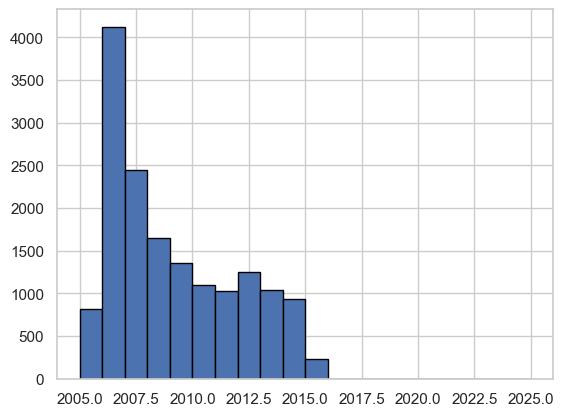

In [89]:
df_final['VISITYR'].hist(bins=range(2005, 2026), edgecolor='black')


In [ ]:
# lista completa das 258 variáveis preditoras de acordo com a Table 1 de james
predictor_vars = [
    # --- Demográficos / Identificação ---
    "NACCREAS","NACCREFR","BIRTH_#MOS","SEX","HISPANIC","HISPOR","PRIMLANG","EDUC","NACCLIVS","INDEPEND","RESIDENC","MARISTAT","HANDED","NACCAGE","NACCNIHR",
    "INBIR_#MOS","INSEX","INRELTO","INLIVWTH","INVISITS","INCALLS","INRELY","NACCMOM","NACCDAD","NACCFAM","ANYMEDS",
    # --- Medicamentos / Condições médicas ---
    "NACCAMD","NACCHTNC","NACCACEI","NACCAAAS","NACCBETA","NACCCCBS","NACCDIUR","NACCVASD","NACCANGI","NACCAHTN",
    "NACCLIPL","NACCNSD","NACCAC","NACCADEP","NACCAPSY","NACCAANX","NACCPDMD","NACCEMD","NACCEPMD","NACCDBMD",
    # --- Exames clínicos e vitais ---
    "BPSYS","BPDIAS","HRATE","VISION","VISCORR","VISWCORR","HEARING","HEARAID","HEARWAID","NACCBMI","ABRUPT","STEPWISE","SOMATIC","EMOT",
    # --- Doenças cardiovasculares e neurológicas ---
    "CVHATT","CVAFIB","CVANGIO","CVBYPASS","CVPACE","CVCHF","CVOTHR","CBSTROKE","NACCSTYR_#YRS","CBTIA","NACCTIYR_#YRS",
    "PD","PDYR_#YRS","PDOTHR","PDOTHRYR_#YRS","SEIZURES","TRAUMBRF","TRAUMEXT","TRAUMCHR","NCOTHR","HYPERTEN","HYPERCHO","DIABETES","B12DEF","THYROID",
    "INCONTU","INCONTF","DEP2YRS","DEPOTHR","ALCOHOL","TOBAC30","TOBAC100","SMOKYRS","PACKSPER","QUITSMOK","ABUSOTHR","PSYCDIS","NACCTBI",
    # --- Neurológico / Motricidade / Parkinsonismo ---
    "GAIT","POSSTAB","BRADYKIN","PDNORMAL","FOCLSYM","FOCLSIGN","HACHIN","HXHYPER","HXSTROKE","SPEECH","FACEXP",
    "TRESTFAC","TRESTLHD","TRESTLFT","TRESTFHD","TRESTRHD","TRESTRFT","RIGDNECK","RIGDUPRT","RIGDUPLF","RIGDLORT",
    "RIGDLOLF","TAPSRT","TAPSLF","HANDMOVR","HANDMOVL","HANDALTR","HANDALTL","LEGRT","LEGLF","ARISING","POSTURE",
    # --- Avaliação cognitiva / CDR ---
    "MEMORY","ORIENT","JUDGMENT","COMMUN","HOMEHOBB","PERSCARE","CDRSUM","CDRGLOB","COGSTAT","NACCC1",
    # --- Testes neuropsicológicos ---
    "MMSELOC","MMSELAN","MMSEORDA","MMSEORDA_PROB","MMSEORLO","MMSEORLO_PROB","NACCMMSE","NACCMMSE_PROB",
    "NPSYCLOC","NPSYLAN","LOGIMEM","LOGIMEM_PROB","DIGIF","DIGIF_PROB","DIGIFLEN","DIGIFLEN_PROB","DIGIB","DIGIB_PROB",
    "DIGIBLEN","DIGIBLEN_PROB","ANIMALS","ANIMALS_PROB","VEG","VEG_PROB","TRAILA","TRAILA_PROB","TRAILB","TRAILB_PROB",
    "WAIS","WAIS_PROB","MEMUNITS","MEMUNITS_PROB","MEMTIME","BOSTON","BOSTON_PROB",
    # --- Depressão e comportamento ---
    "NACCGDS","NACCBEHF","NACCBEFX","BEAPATHY","BEDEP","BEVHALL","BEAHALL","BEDEL","BEDISIN","BEIRRIT","BEAGIT","BEPERCH","BEOTHR",
    "SATIS","DROPACT","EMPTY","BORED","SPIRITS","AFRAID","HAPPY","HELPLESS","STAYHOME","MEMPROB","WONDRFUL","WRTHLESS","ENERGY","HOPELESS","BETTER",
    # --- Funcionalidade diária ---
    "BILLS","TAXES","SHOPPING","GAMES","STOVE","MEALPREP","EVENTS","PAYATTN","REMDATES","TRAVEL","FOCLDEF","GAITDIS","EYEMOVE",
    # --- Movimento e modo ---
    "MOGAIT","MOFALLS","MOTREM","MOSLOW","NACCMOTF","MOMODE","COURSE","FRSTCHG","DECIN","DECSUB","DECAGE","COGMEM","COGJUDG","COGLANG","COGVIS","COGATTN","COGOTHR","COGMODE",
    # --- Variáveis aleatórias auxiliares ---
    "RANDVAR_0","RANDVAR_1","RANDVAR_2","RANDVAR_3"
]

#  quais variaveis estao presentes no dataset
cols_present = [col for col in predictor_vars if col in df_final.columns]
cols_missing = [col for col in predictor_vars if col not in df_final.columns]

print(f"Total de variáveis esperadas: {len(predictor_vars)}")
print(f"Encontradas no dataset: {len(cols_present)}")
print(f"Ausentes: {len(cols_missing)}")

print("\nExemplo de variáveis ausentes:")
print(cols_missing[:30])

# criar X (features) e y (target)
X = df_final[cols_present].copy()
y = df_final['incident_dementia']

print(f"\nShape de X: {X.shape}")
print(f"Shape de y: {y.shape}")


Total de variáveis esperadas: 238
Encontradas no dataset: 212
Ausentes: 26

Exemplo de variáveis ausentes:
['BIRTH_#MOS', 'INBIR_#MOS', 'NACCSTYR_#YRS', 'NACCTIYR_#YRS', 'PDYR_#YRS', 'PDOTHRYR_#YRS', 'TRESTFHD', 'MMSEORDA_PROB', 'MMSEORLO_PROB', 'NACCMMSE_PROB', 'LOGIMEM_PROB', 'DIGIF_PROB', 'DIGIFLEN_PROB', 'DIGIB_PROB', 'DIGIBLEN_PROB', 'ANIMALS_PROB', 'VEG_PROB', 'TRAILA_PROB', 'TRAILB_PROB', 'WAIS_PROB', 'MEMUNITS_PROB', 'BOSTON_PROB', 'RANDVAR_0', 'RANDVAR_1', 'RANDVAR_2', 'RANDVAR_3']

Shape de X: (15974, 212)
Shape de y: (15974,)


In [ ]:
# mapeamento de colunas equivalentes entre UDS v2 e v3
name_map = {
    'BIRTH_#MOS': 'BIRTHMO',
    'INBIR_#MOS': 'INBIRMO',
    'NACCSTYR_#YRS': 'NACCSTYR',
    'NACCTIYR_#YRS': 'NACCTIYR',
    'PDYR_#YRS': 'PDYR',
    'PDOTHRYR_#YRS': 'PDOTHRYR',
    'TRESTFHD': 'TRESTRHD'
}

predictor_vars_fixed = [
    name_map.get(var, var) for var in predictor_vars
    if not var.endswith('_PROB') and not var.startswith('RANDVAR_')
]

cols_present_fixed = [c for c in predictor_vars_fixed if c in df_final.columns]
cols_missing_fixed = [c for c in predictor_vars_fixed if c not in df_final.columns]

print(f"Total após ajuste: {len(predictor_vars_fixed)}")
print(f"Encontradas no dataset: {len(cols_present_fixed)}")
print(f"Ausentes após ajuste: {len(cols_missing_fixed)}")
print("\nVariáveis ainda ausentes (se houver):")
print(cols_missing_fixed)

X = df_final[cols_present_fixed].copy()
y = df_final['incident_dementia']

print(f"\nShape de X: {X.shape}")
print(f"Shape de y: {y.shape}")


Total após ajuste: 219
Encontradas no dataset: 219
Ausentes após ajuste: 0

Variáveis ainda ausentes (se houver):
[]

Shape de X: (15974, 219)
Shape de y: (15974,)


In [ ]:
#imputação

X_imputed = X.copy(deep=True)
skipped_cols = []

def sample_impute(series):
    non_null_values = series.dropna().values
    n_missing = series.isna().sum()
    if n_missing > 0 and len(non_null_values) > 0:
        imputed_values = np.random.choice(non_null_values, size=n_missing, replace=True)
        series = series.copy()
        series.loc[series.isna()] = imputed_values
    return series

for col in tqdm(X_imputed.columns, desc="Imputando valores faltantes"):
    try:
        X_imputed[col] = sample_impute(X_imputed[col])
    except Exception as e:
        skipped_cols.append((col, str(e)))

if skipped_cols:
    print(f"⚠️ Colunas ignoradas ({len(skipped_cols)}): {[c[0] for c in skipped_cols]}")


#escalonar numéricas
num_cols = X_imputed.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_imputed[num_cols] = scaler.fit_transform(X_imputed[num_cols])

# corrigir colunas com estruturas invalidas
def fix_multidimensional_cols(df):
    drop_cols = []
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, (list, np.ndarray, pd.DataFrame))).any():
            drop_cols.append(col)
    if drop_cols:
        print(f"⚠️ Colunas removidas: {drop_cols}")
        df = df.drop(columns=drop_cols)
    return df

X_model = fix_multidimensional_cols(X_imputed)

#garantir ausencia de NaN 
X_model = X_model.fillna(X_model.median(numeric_only=True))

print(f"\n✅ Dataset pronto: {X_model.shape} | NaN restantes: {X_model.isna().sum().sum()}")


Imputando valores faltantes: 100%|██████████| 219/219 [00:00<00:00, 3641.70it/s]

⚠️ Colunas ignoradas (2): ['TRESTRHD', 'TRESTRHD']



✅ Dataset pronto: (15974, 219) | NaN restantes: 0


In [ ]:
#classificar as variaveis
assert 'X' in globals() and isinstance(X, pd.DataFrame), "Defina o DataFrame X antes."

if X.columns.duplicated().any():
    print("⚠️ Há nomes de colunas duplicados em X; usando indexação por posição.")

def infer_type(s: pd.Series) -> str:
    s2 = s.dropna()
    nunique = s2.nunique(dropna=True)
    if nunique == 2:
        return 'Binary'
    if pd.api.types.is_numeric_dtype(s):
        return 'Continuous' if nunique > 10 else 'Categorical'
    if pd.api.types.is_string_dtype(s) or str(s.dtype) in ('object', 'category'):
        return 'Categorical'
    return 'Unknown'

cols = list(X.columns)

var_types = [infer_type(X.iloc[:, i]) for i in range(X.shape[1])]
var_types_df = pd.DataFrame({'VAR_NAME': cols, 'VAR_TYPE': var_types})

print(var_types_df.head(20))
print("\nContagem de tipos:")
print(var_types_df['VAR_TYPE'].value_counts())

variables_for_dummy = var_types_df['VAR_NAME'].values
var_types_for_dummy = var_types_df['VAR_TYPE'].values
with open('ImpVars_dummy.pkl', 'wb') as f:

    pickle.dump([None, None, None, variables_for_dummy, None, var_types_for_dummy, None], f)

print(f"\n💾 'ImpVars_dummy.pkl' salvo. Variáveis: {len(variables_for_dummy)}")

⚠️ Há nomes de colunas duplicados em X; usando indexação por posição.
    VAR_NAME     VAR_TYPE
0   NACCREAS  Categorical
1   NACCREFR       Binary
2    BIRTHMO  Categorical
3        SEX       Binary
4   HISPANIC       Binary
5     HISPOR  Categorical
6   PRIMLANG  Categorical
7       EDUC   Continuous
8   NACCLIVS  Categorical
9   INDEPEND  Categorical
10  RESIDENC  Categorical
11  MARISTAT  Categorical
12    HANDED  Categorical
13   NACCAGE   Continuous
14  NACCNIHR  Categorical
15   INBIRMO  Categorical
16     INSEX       Binary
17   INRELTO  Categorical
18  INLIVWTH       Binary
19  INVISITS  Categorical

Contagem de tipos:
VAR_TYPE
Categorical    97
Binary         92
Continuous     30
Name: count, dtype: int64

💾 'ImpVars_dummy.pkl' salvo. Variáveis: 219


In [ ]:
#salvar os dados
X_values_imputed = X_model.values
columns_imputed = X_model.columns.values
outcome_values = y.values

try:
    with open('processed_data.pkl', 'wb') as f:
        pickle.dump([X_values_imputed, columns_imputed, outcome_values], f)
    print("💾 Arquivo 'processed_data.pkl' salvo com sucesso.")
except Exception as e:
    print(f"❌ Erro ao salvar 'processed_data.pkl': {e}")

try:
    participant_ids = df_final['NACCID'].astype(str).values
    np.save('NACCID.npy', participant_ids)
    print("💾 Arquivo 'NACCID.npy' salvo com sucesso.")
except Exception as e:
    print(f"❌ Erro ao salvar 'NACCID.npy': {e}")

print(f"Shape dos dados (X) salvos: {X_values_imputed.shape}")
print(f"Número de colunas salvas: {len(columns_imputed)}")
print(f"Shape do outcome (y) salvo: {outcome_values.shape}")
print(f"Número de IDs salvos: {len(participant_ids)}")

💾 Arquivo 'processed_data.pkl' salvo com sucesso.
💾 Arquivo 'NACCID.npy' salvo com sucesso.
Shape dos dados (X) salvos: (15974, 219)
Número de colunas salvas: 219
Shape do outcome (y) salvo: (15974,)
Número de IDs salvos: 15974


### 5KFOLD

In [ ]:
def calculate_diagnostic_performance(actual_predicted):
    #actual_predicted = test_results.values
    actual_positives = actual_predicted[:, 0] == 1
    actual_negatives = actual_predicted[:, 0] == 0
    test_positives = actual_predicted[:, 1] == 1
    test_negatives = actual_predicted[:, 1] == 0
    test_correct = actual_predicted[:, 0] == actual_predicted[:, 1]
    accuracy = np.average(test_correct)
    true_positives = actual_positives & test_positives
    true_negatives = actual_negatives & test_negatives
    sensitivity = np.sum(true_positives) / np.sum(actual_positives)
    specificity = np.sum(true_negatives) / np.sum(actual_negatives)
    positive_likelihood = sensitivity / (1 - specificity)
    negative_likelihood = (1 - sensitivity) / specificity
    false_postive_rate = 1 - specificity
    false_negative_rate = 1 - sensitivity
    positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
    negative_predicitive_value = np.sum(true_negatives) / np.sum(test_negatives)
    positive_rate = np.mean(actual_predicted[:,1])
    return ['accuracy', 'sensitivity', 'specificity', 'positive_likelihood',
            'negative_likelihood', 'false_postive_rate', 'false_negative_rate',
            'positive_predictive_value', 'negative_predicitive_value',
            'positive_rate'], [accuracy, sensitivity, specificity, positive_likelihood,
            negative_likelihood, false_postive_rate, false_negative_rate,
            positive_predictive_value, negative_predicitive_value,
            positive_rate]

In [ ]:
from sklearn.metrics import roc_auc_score

def bootstrap_metrics(y_true, y_pred, y_prob, n_iter):
    
    vals=[]
    for iteration in range(n_iter):
        selection = np.random.randint(0,len(y_true), size=3460)

        true = [y_true[i] for i in selection]
        pred = [y_pred[i] for i in selection]
        prob = [y_prob[i] for i in selection]
        
        ap = np.array(list(zip(true,pred)))
        _,performance = calculate_diagnostic_performance(ap)
        
        auc = roc_auc_score(true, prob)
        
        
        vals.append([performance[0],performance[1], performance[2], performance[-2], performance[-3], auc])
        
    return vals

In [ ]:
try:
    with open('processed_data.pkl', 'rb') as f:
        [data_imputed, variables_imputed, outcome_loaded] = pickle.load(f)
    print("✅ Arquivo 'processed_data.pkl' carregado com sucesso.")
    print(f"Shape inicial dos dados carregados: {data_imputed.shape}")

except FileNotFoundError:
    print("❌ Erro: Arquivo 'processed_data.pkl' não encontrado. Execute a célula anterior para salvá-lo.")


# one-hot encoding 
print("\nIniciando One-Hot Encoding...")
data_encoded = data_imputed.copy()
variables_encoded = list(variables_imputed).copy() 
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 
cols_to_remove_indices = []
new_encoded_cols_data = []
new_encoded_cols_names = []

def add_new_variable(name, categories):
    return [f"{name}_{cat}" for cat in categories]

# itera de tras para frente para evitar problemas com indices ao remover colunas
for i in range(len(variables_encoded) - 1, -1, -1):
    col_name = variables_encoded[i]
    is_categorical = (var_types[i] == 'Categorical') or (data_encoded[:, i].dtype == 'object')

    if is_categorical:
        print(f"  Codificando: {col_name}")
        column_data = data_encoded[:, i].reshape(-1, 1)

        try:
            encoded_data = enc.fit_transform(column_data)
            categories = enc.categories_[0]
            new_names = add_new_variable(col_name, categories)

            cols_to_remove_indices.append(i)
            new_encoded_cols_data.append(encoded_data)
            new_encoded_cols_names.extend(new_names) 

        except Exception as e:
            print(f"  ⚠️ Erro ao codificar {col_name}: {e}. Coluna mantida.")


# remove as colunas categoricas originais 
if cols_to_remove_indices:
    cols_to_remove_indices.sort(reverse=True)
    for index in cols_to_remove_indices:
        data_encoded = np.delete(data_encoded, index, axis=1)
        del variables_encoded[index] 

# aiciona as novas colunas codificadas
if new_encoded_cols_data:
    new_data_block = np.hstack(new_encoded_cols_data[::-1]) 
    data_encoded = np.hstack((data_encoded, new_data_block))
    variables_encoded.extend(new_encoded_cols_names) 

print(f"Shape após One-Hot Encoding: {data_encoded.shape}")


# escalonamento final
print("\nIniciando Escalonamento (StandardScaler)...")
try:

    data_encoded_numeric = data_encoded.astype(float)
    scaler = preprocessing.StandardScaler()
    data_scaled = scaler.fit_transform(data_encoded_numeric)
    print("✅ Dados escalonados com sucesso.")
except ValueError as e:
    print(f"❌ Erro no escalonamento: {e}. Verifique se todas as colunas são numéricas após o encoding.")
    data_scaled = data_encoded 

try:
    np.save('encoded_data.npy', data_scaled)
    np.save('outcome.npy', np.array(outcome_loaded, dtype=int))
    np.save('encoded_variables.npy', np.array(variables_encoded))

    print("\n💾 Arquivos 'encoded_data.npy', 'outcome.npy' e 'encoded_variables.npy' salvos com sucesso.")
    print(f"Shape final dos dados salvos: {data_scaled.shape}")
    print(f"Número final de variáveis salvas: {len(variables_encoded)}")

except Exception as e:
    print(f"❌ Erro ao salvar arquivos finais: {e}")

# limpa variaveis intermediárias se desejar (opcional)
del data_imputed, variables_imputed, outcome_loaded, data_encoded, variables_encoded, data_scaled

✅ Arquivo 'processed_data.pkl' carregado com sucesso.
Shape inicial dos dados carregados: (15974, 219)
✅ Tipos de variáveis carregados e mapeados.

Iniciando One-Hot Encoding...
  Codificando: COGMODE
  Codificando: FRSTCHG
  Codificando: COURSE
  Codificando: MOMODE
  Codificando: NACCMOTF
  Codificando: TRAVEL
  Codificando: REMDATES
  Codificando: PAYATTN
  Codificando: EVENTS
  Codificando: MEALPREP
  Codificando: STOVE
  Codificando: GAMES
  Codificando: SHOPPING
  Codificando: TAXES
  Codificando: BILLS
  Codificando: NACCBEFX
  Codificando: NACCBEHF
  Codificando: NPSYLAN
  Codificando: NPSYCLOC
  Codificando: MMSEORLO
  Codificando: MMSEORDA
  Codificando: MMSELAN
  Codificando: MMSELOC
  Codificando: COGSTAT
  Codificando: CDRGLOB
  Codificando: PERSCARE
  Codificando: HOMEHOBB
  Codificando: COMMUN
  Codificando: JUDGMENT
  Codificando: ORIENT
  Codificando: MEMORY
  Codificando: POSTURE
  Codificando: ARISING
  Codificando: LEGLF
  Codificando: LEGRT
  Codificando: HANDALTL


In [ ]:
# funcao geral - k-fold cv, gridsearchCV, metricas e bootstrap

def run_full_cv_evaluation(model_instance, model_name, param_grid,
                           X_data, y_data, variable_names,
                           n_splits=5, random_state=42,
                           n_bootstrap_iter=1000, # 1000 como no original
                           gridcv_n_jobs=-1):
    """
    Executa validação cruzada K-Fold completa com GridSearchCV e Bootstrap por fold.

    Args:
        model_instance: Instância do classificador sklearn (ex: SVC(), RandomForestClassifier()).
        model_name (str): Nome do modelo para logs e salvamento (ex: 'SVM', 'RF').
        param_grid (dict): Dicionário com hiperparâmetros para GridSearchCV.
        X_data (np.array): Matriz completa de features (numérica).
        y_data (np.array): Vetor completo do target (0 ou 1).
        variable_names (np.array): Nomes das features.
        n_splits (int): Número de folds para StratifiedKFold.
        random_state (int): Seed para reprodutibilidade do KFold.
        n_bootstrap_iter (int): Número de iterações para bootstrap_metrics.
        gridcv_n_jobs (int): Número de jobs para GridSearchCV (-1 usa todos os cores).

    Returns:
        tuple: Contendo:
            - cv_results_df (pd.DataFrame): Métricas detalhadas para cada fold.
            - mean_cv_results (pd.Series): Médias das métricas nos folds.
            - best_models_per_fold (list): Lista dos melhores estimadores de cada fold.
            - all_fold_bootstrap_errors (list): Lista de listas com resultados bootstrap por fold.
            - feature_importances_per_fold (list): Lista de importâncias/coeficientes por fold.
            - all_preds (list): Lista concatenada de todas as previsões nos folds de teste.
            - all_probs (list): Lista concatenada de todas as probabilidades nos folds de teste.
            - all_true (list): Lista concatenada de todos os valores reais nos folds de teste.
    """
    print(f"\n--- Iniciando Avaliação Completa para: {model_name} ---")
    start_time_total = time.time()

    skf_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    fold_metrics_list = []
    best_models_per_fold = []
    all_fold_bootstrap_errors = []
    feature_importances_per_fold = []
    all_preds, all_probs, all_true = [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf_cv.split(X_data, y_data), 1):
        fold_start_time = time.time()
        print(f"  Iniciando Fold {fold}/{n_splits}...")

        X_train, X_test = X_data[train_idx], X_data[test_idx]
        y_train, y_test = y_data[train_idx], y_data[test_idx]
        # GridSearchCV dentro do fold
        inner_cv_model = clone(model_instance)
        grid = GridSearchCV(
            estimator=inner_cv_model,
            param_grid=param_grid,
            scoring='roc_auc',  
            cv=3,              
            n_jobs=gridcv_n_jobs,
            verbose=0          
        )

        print(f"    Ajustando GridSearchCV...")
        grid.fit(X_train, y_train)
        best_model_fold = grid.best_estimator_
        best_models_per_fold.append(best_model_fold)
        print(f"    Melhores Parâmetros: {grid.best_params_}")

        print(f"    Fazendo previsões...")
        y_pred = best_model_fold.predict(X_test)
        # verifica se predict_proba existe 
        if hasattr(best_model_fold, "predict_proba"):
             y_prob = best_model_fold.predict_proba(X_test)[:, 1]
        else:
             print("    Warning: Modelo não possui predict_proba. Usando decision_function ou previsões diretas para AUC.")
             y_prob = getattr(best_model_fold, "decision_function", lambda x: best_model_fold.predict(x))(X_test)

        all_preds.extend(y_pred)
        all_probs.extend(y_prob)
        all_true.extend(y_test)

        print(f"    Calculando métricas...")
        metric_names, metric_values = calculate_diagnostic_performance(np.array(list(zip(y_test, y_pred))))
        auc_fold = np.nan
        if len(np.unique(y_test)) > 1:
            try:
                auc_fold = roc_auc_score(y_test, y_prob)
            except ValueError as e:
                print(f"    Warning: Não foi possível calcular AUC para o fold {fold}: {e}")

        fold_results_dict = dict(zip(metric_names, metric_values))
        fold_results_dict['auc'] = auc_fold
        fold_results_dict['fold'] = fold
        fold_results_dict['best_params'] = grid.best_params_
        fold_metrics_list.append(fold_results_dict)

        # bootstrap por Fold
        print(f"    Executando bootstrap ({n_bootstrap_iter} iterações)...")
        errors_fold = bootstrap_metrics(y_test, y_pred, y_prob, n_iter=n_bootstrap_iter)
        all_fold_bootstrap_errors.append(errors_fold)
        print(f"    Bootstrap concluído.")

        # importância das features
        if hasattr(best_model_fold, 'feature_importances_'):
            feature_importances_per_fold.append(best_model_fold.feature_importances_)
        elif hasattr(best_model_fold, 'coef_'):
            feature_importances_per_fold.append(best_model_fold.coef_.flatten())
        else:
            feature_importances_per_fold.append(np.full(X_data.shape[1], np.nan)) 

        fold_end_time = time.time()
        print(f"  Fold {fold} concluído em {fold_end_time - fold_start_time:.2f} segundos.")
        print(f"    Métricas Fold {fold}: Acc={fold_results_dict['accuracy']:.3f}, AUC={fold_results_dict['auc']:.3f}")

    cv_results_df = pd.DataFrame(fold_metrics_list)
    mean_cv_results = cv_results_df.mean(numeric_only=True)

    total_end_time = time.time()
    print(f"--- Avaliação Completa para {model_name} concluída em {total_end_time - start_time_total:.2f} segundos ---")

    return (cv_results_df, mean_cv_results, best_models_per_fold,
            all_fold_bootstrap_errors, feature_importances_per_fold,
            all_preds, all_probs, all_true)

### SVM Linear

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm_param_grid = {
    'kernel': ['linear'],   
    'C': [0.1, 1, 10],

}

try:
    X_final = np.load('encoded_data.npy')
    y_final = np.load('outcome.npy')
    final_variable_names = np.load('encoded_variables.npy')
    print(f"✅ Dados carregados: X_final={X_final.shape}, y_final={len(y_final)}")

    # reduzir tamanho da amostra, mantendo estratificação
    if X_final.shape[0] > 5000:
        X_sub, _, y_sub, _ = train_test_split(
            X_final, y_final,
            stratify=y_final,
            test_size=0.8,  
        )
        print(f"⚡ Dataset reduzido para {X_sub.shape[0]} amostras (estratificado).")
    else:
        X_sub, y_sub = X_final, y_final
        print("✅ Dataset pequeno — usando todas as amostras.")

except FileNotFoundError:
    raise FileNotFoundError("❌ Arquivos 'encoded_data.npy', 'outcome.npy' ou 'encoded_variables.npy' não encontrados.")


try:
    (svm_cv_results_df, svm_mean_cv_results, svm_best_models,
     svm_all_fold_errors, svm_feature_importances,
     svm_all_preds, svm_all_probs, svm_all_true) = run_full_cv_evaluation(
                                                        model_instance=SVC(probability=True, random_state=42,class_weight='balanced'),
                                                        model_name='SVM',
                                                        param_grid=svm_param_grid,
                                                        X_data=X_final,
                                                        y_data=y_final,
                                                        variable_names=final_variable_names,
                                                        n_splits=5,
                                                        n_bootstrap_iter=1000 
                                                      )


    print("\n=== MÉDIAS (5-FOLD) — SVM (com GridSearch e Bootstrap por fold) ===")
    display(svm_mean_cv_results.round(3))
    print("\nDetalhes por Fold:")
    display(svm_cv_results_df) 


    try:
        os.makedirs('5fold', exist_ok=True)
        with open('5fold/svm_results.pkl', 'wb') as f:
            pickle.dump([
                svm_cv_results_df['auc'].tolist(),       
                svm_cv_results_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(), 
                svm_best_models,                         
                svm_all_fold_errors,                     
                svm_feature_importances,                 
                svm_all_probs,                          
                svm_all_preds,                           
                final_variable_names                     
            ], f)
        print("💾 Arquivo '5fold/svm_results.pkl' salvo com sucesso.")
    except Exception as e:
        print(f"❌ Erro ao salvar '5fold/svm_results.pkl': {e}")

except NameError as ne:
     print(f"❌ Erro: Variável não definida ({ne}). Certifique-se que X_final, y_final, etc., foram carregados.")
except Exception as e:
     print(f"❌ Erro inesperado durante a avaliação do SVM: {e}")

✅ Dados carregados: X_final=(15974, 616), y_final=15974
⚡ Dataset reduzido para 3194 amostras (estratificado).

--- Iniciando Avaliação Completa para: SVM ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 2294.86 segundos.
    Métricas Fold 1: Acc=0.822, AUC=0.839
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 2173.24 segundos.
    Métricas Fold 2: Acc=0.814, AUC=0.811
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bo

accuracy                      0.817
sensitivity                   0.678
specificity                   0.825
positive_likelihood           3.889
negative_likelihood           0.390
false_postive_rate            0.175
false_negative_rate           0.322
positive_predictive_value     0.195
negative_predicitive_value    0.976
positive_rate                 0.204
auc                           0.831
fold                          3.000
dtype: float64

💾 Arquivo '5fold/svm_results.pkl' salvo com sucesso.


In [100]:
## ============================================
# MODELO: SVM Linear - Avaliação Completa
# ============================================
from sklearn.svm import SVC
import pickle
import pandas as pd # Para display
import numpy as np # Para carregar dados
import os # Para criar diretório


# --- Definição da grade de hiperparâmetros específica para SVM ---
svm_param_grid = {
    'kernel': ['linear'],   # Ou ['linear', 'rbf'] se quiser testar ambos
    'C': [0.1, 1, 10],
    # 'gamma': ['scale', 'auto'] # Adicionar se testar kernel='rbf'
}

# --- Carregar dados finais (necessário se não estiverem na memória) ---
try:
    # >>> DESCOMENTE AS PRÓXIMAS 4 LINHAS <<<
    X_final = np.load('encoded_data.npy')
    y_final = np.load('outcome.npy')
    final_variable_names = np.load('encoded_variables.npy')
    print("✅ Dados finais para SVM carregados.") # Mensagem ajustada
except FileNotFoundError:
    print("❌ Erro: Arquivos de dados finais ('encoded_data.npy', 'outcome.npy', 'encoded_variables.npy') não encontrados. Execute as células de pré-processamento.")
    # Interromper aqui ou raise Exception("Arquivos não encontrados")
try:
    (svm_cv_results_df, svm_mean_cv_results, svm_best_models,
     svm_all_fold_errors, svm_feature_importances,
     svm_all_preds, svm_all_probs, svm_all_true) = run_full_cv_evaluation(
                                                        model_instance=SVC(probability=True, random_state=42,class_weight='balanced'),
                                                        model_name='SVM',
                                                        param_grid=svm_param_grid,
                                                        X_data=X_final,
                                                        y_data=y_final,
                                                        variable_names=final_variable_names,
                                                        n_splits=5,
                                                        n_bootstrap_iter=1000 # Reduzido para teste rápido, use 1000 no final
                                                      )

    # --- Exibir Resultados Médios ---
    print("\n=== MÉDIAS (5-FOLD) — SVM (com GridSearch e Bootstrap por fold) ===")
    display(svm_mean_cv_results.round(3))
    # print("\nDetalhes por Fold:")
    # display(svm_cv_results_df) # Descomente para ver detalhes

    # --- Salvar resultados detalhados ---
    try:
        # Certifique-se que o diretório '5fold' existe
        os.makedirs('5fold', exist_ok=True)
        with open('5fold/svm_results.pkl', 'wb') as f:
            pickle.dump([
                svm_cv_results_df['auc'].tolist(),       # AUCs por fold
                svm_cv_results_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(), # Métricas por fold
                svm_best_models,                         # Melhores modelos por fold
                svm_all_fold_errors,                     # Erros bootstrap por fold
                svm_feature_importances,                 # Importâncias/Coefs por fold
                svm_all_probs,                           # Probabilidades concatenadas
                svm_all_preds,                           # Previsões concatenadas
                final_variable_names                     # Nomes das variáveis finais
            ], f)
        print("💾 Arquivo '5fold/svm_results.pkl' salvo com sucesso.")
    except Exception as e:
        print(f"❌ Erro ao salvar '5fold/svm_results.pkl': {e}")

except NameError as ne:
     print(f"❌ Erro: Variável não definida ({ne}). Certifique-se que X_final, y_final, etc., foram carregados.")
except Exception as e:
     print(f"❌ Erro inesperado durante a avaliação do SVM: {e}")


# === REMOVER OU COMENTAR a seção de bootstrap_evaluation global ===
# A chamada a bootstrap_evaluation que vinha AQUI foi incorporada em run_full_cv_evaluation
# (através da chamada a bootstrap_metrics dentro do loop)
# print("\n=== BOOTSTRAP GLOBAL...") # Remover esta seção

✅ Dados finais para SVM carregados.

--- Iniciando Avaliação Completa para: SVM ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 2237.82 segundos.
    Métricas Fold 1: Acc=0.822, AUC=0.839
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 2083.41 segundos.
    Métricas Fold 2: Acc=0.814, AUC=0.811
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 3 concluído em 2068.88 segundos.
    Métricas Fol

accuracy                      0.817
sensitivity                   0.678
specificity                   0.825
positive_likelihood           3.889
negative_likelihood           0.390
false_postive_rate            0.175
false_negative_rate           0.322
positive_predictive_value     0.195
negative_predicitive_value    0.976
positive_rate                 0.204
auc                           0.831
fold                          3.000
dtype: float64

💾 Arquivo '5fold/svm_results.pkl' salvo com sucesso.


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200, 300], 
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20],
    'max_depth': [10, 50, None], 
    'max_features': [20, 50, 'sqrt', 'log2'] 
}


try:
    X_final = np.load('encoded_data.npy')
    y_final = np.load('outcome.npy')
    final_variable_names = np.load('encoded_variables.npy')
    print("✅ Dados finais para RF carregados.")
except FileNotFoundError:
    print("❌ Erro: Arquivos de dados finais ('encoded_data.npy', 'outcome.npy', 'encoded_variables.npy') não encontrados. Execute as células de pré-processamento.")

try:
    (rf_cv_results_df, rf_mean_cv_results, rf_best_models,
     rf_all_fold_errors, rf_feature_importances,
     rf_all_preds, rf_all_probs, rf_all_true) = run_full_cv_evaluation(
                                                model_instance=RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced_subsample'), # n_jobs=-1 aqui também
                                                model_name='RF',
                                                param_grid=rf_param_grid,
                                                X_data=X_final,
                                                y_data=y_final,
                                                variable_names=final_variable_names,
                                                n_splits=5,
                                                n_bootstrap_iter=1000 
                                              )


    print("\n=== MÉDIAS (5-FOLD) — Random Forest (com GridSearch e Bootstrap por fold) ===")
    display(rf_mean_cv_results.round(3))

    try:

        os.makedirs('5fold', exist_ok=True)
        with open('5fold/rf_results.pkl', 'wb') as f:
            pickle.dump([
                rf_cv_results_df['auc'].tolist(),       
                rf_cv_results_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(), 
                rf_best_models,                         
                rf_all_fold_errors,                     
                rf_feature_importances,                 
                rf_all_probs,                           
                rf_all_preds,                           
                final_variable_names                     
            ], f)
        print("💾 Arquivo '5fold/rf_results.pkl' salvo com sucesso.")
    except Exception as e:
        print(f"❌ Erro ao salvar '5fold/rf_results.pkl': {e}")

except NameError as ne:
     print(f"❌ Erro: Variável não definida ({ne}). Certifique-se que X_final, y_final, etc., foram carregados/definidos.")
except Exception as e:
     print(f"❌ Erro inesperado durante a avaliação do Random Forest: {e}")

✅ Dados finais para RF carregados.

--- Iniciando Avaliação Completa para: RF ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 300}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 340.64 segundos.
    Métricas Fold 1: Acc=0.939, AUC=0.906
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 300}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 347.08 segundos.
    Métricas Fold 2: Acc=0.935, AUC=0.889
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 50, 'max_feat

accuracy                       0.935
sensitivity                    0.190
specificity                    0.981
positive_likelihood           10.934
negative_likelihood            0.825
false_postive_rate             0.019
false_negative_rate            0.810
positive_predictive_value      0.404
negative_predicitive_value     0.951
positive_rate                  0.029
auc                            0.893
fold                           3.000
dtype: float64

💾 Arquivo '5fold/rf_results.pkl' salvo com sucesso.


### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_param_grid = {
    'C': [0.1, 1, 5, 10], 
    'max_iter': [10000],  
    'solver': ['liblinear', 'lbfgs'] 
}

try:
    X_final = np.load('encoded_data.npy')
    y_final = np.load('outcome.npy')
    final_variable_names = np.load('encoded_variables.npy')
    print("✅ Dados finais para LR carregados.")
except FileNotFoundError:
    print("❌ Erro: Arquivos de dados finais ('encoded_data.npy', 'outcome.npy', 'encoded_variables.npy') não encontrados. Execute as células de pré-processamento.")

try:
    (lr_cv_results_df, lr_mean_cv_results, lr_best_models,
     lr_all_fold_errors, lr_feature_importances,
     lr_all_preds, lr_all_probs, lr_all_true) = run_full_cv_evaluation(
                                                model_instance=LogisticRegression(random_state=42, max_iter=10000,class_weight='balanced'), # max_iter aqui também
                                                model_name='LR',
                                                param_grid=lr_param_grid,
                                                X_data=X_final,
                                                y_data=y_final,
                                                variable_names=final_variable_names,
                                                n_splits=5,
                                                n_bootstrap_iter=1000 
                                              )

    print("\n=== MÉDIAS (5-FOLD) — Logistic Regression (com GridSearch e Bootstrap por fold) ===")
    display(lr_mean_cv_results.round(3))
    print("\nDetalhes por Fold:")
    display(lr_cv_results_df) 

    try:
        os.makedirs('5fold', exist_ok=True)
        with open('5fold/lr_results.pkl', 'wb') as f:
            pickle.dump([
                lr_cv_results_df['auc'].tolist(),       
                lr_cv_results_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(), 
                lr_best_models,                         
                lr_all_fold_errors,                     
                lr_feature_importances,                 
                lr_all_probs,                           
                lr_all_preds,                           
                final_variable_names                     
            ], f)
        print("💾 Arquivo '5fold/lr_results.pkl' salvo com sucesso.")
    except Exception as e:
        print(f"❌ Erro ao salvar '5fold/lr_results.pkl': {e}")

except NameError as ne:
     print(f"❌ Erro: Variável não definida ({ne}). Certifique-se que X_final, y_final, etc., foram carregados/definidos.")
except Exception as e:
     print(f"❌ Erro inesperado durante a avaliação da Logistic Regression: {e}")

✅ Dados finais para LR carregados.

--- Iniciando Avaliação Completa para: LR ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 28.56 segundos.
    Métricas Fold 1: Acc=0.837, AUC=0.848
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 22.35 segundos.
    Métricas Fold 2: Acc=0.823, AUC=0.824
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluí

accuracy                      0.828
sensitivity                   0.682
specificity                   0.837
positive_likelihood           4.194
negative_likelihood           0.380
false_postive_rate            0.163
false_negative_rate           0.318
positive_predictive_value     0.208
negative_predicitive_value    0.977
positive_rate                 0.193
auc                           0.841
fold                          3.000
dtype: float64

💾 Arquivo '5fold/lr_results.pkl' salvo com sucesso.


### Gradient boosting

In [ ]:
# Nota: o artigo original usava GradientBoostingClassifier, não XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier

gb_param_grid = {
    'n_estimators': [100, 200, 300], 
    'min_samples_split': [2, 5, 10, 20],
    'max_depth': [5, 10, 50], 
    'max_features': ['sqrt', 'log2', None],
    'learning_rate': [0.01, 0.05, 0.1]
}

try:
    X_final = np.load('encoded_data.npy')
    y_final = np.load('outcome.npy')
    final_variable_names = np.load('encoded_variables.npy')
    print("✅ Dados finais para Gradient Boosting carregados.")
except FileNotFoundError:
    print("❌ Erro: Arquivos de dados finais ('encoded_data.npy', 'outcome.npy', 'encoded_variables.npy') não encontrados. Execute as células de pré-processamento.")

try:
    (gb_cv_results_df, gb_mean_cv_results, gb_best_models,
     gb_all_fold_errors, gb_feature_importances,
     gb_all_preds, gb_all_probs, gb_all_true) = run_full_cv_evaluation(
                                                model_instance=GradientBoostingClassifier(random_state=42),
                                           
                                                model_name='GB',
                                                param_grid=gb_param_grid,
                                                X_data=X_final,
                                                y_data=y_final,
                                                variable_names=final_variable_names,
                                                n_splits=5,
                                                n_bootstrap_iter=1000 
                                              )

    print("\n=== MÉDIAS (5-FOLD) — Gradient Boosting (com GridSearch e Bootstrap por fold) ===")
    display(gb_mean_cv_results.round(3))
    print("\nDetalhes por Fold:")
    display(gb_cv_results_df)
   
    try:
        os.makedirs('5fold', exist_ok=True)
        with open('5fold/xgb_results.pkl', 'wb') as f:
            pickle.dump([
                gb_cv_results_df['auc'].tolist(),       
                gb_cv_results_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(), 
                gb_best_models,                       
                gb_all_fold_errors,                  
                gb_feature_importances,         
                gb_all_probs,                          
                gb_all_preds,                          
                final_variable_names                     
            ], f)
        print("💾 Arquivo '5fold/xgb_results.pkl' (usando GradientBoosting) salvo com sucesso.")
    except Exception as e:
        print(f"❌ Erro ao salvar '5fold/xgb_results.pkl': {e}")

except NameError as ne:
     print(f"❌ Erro: Variável não definida ({ne}). Certifique-se que X_final, y_final, etc., foram carregados/definidos.")
except Exception as e:
     print(f"❌ Erro inesperado durante a avaliação do Gradient Boosting: {e}")

✅ Dados finais para Gradient Boosting carregados.

--- Iniciando Avaliação Completa para: GB ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 2298.48 segundos.
    Métricas Fold 1: Acc=0.942, AUC=0.908
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 2093.52 segundos.
    Métricas Fold 2: Acc=0.941, AUC=0.885
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}

accuracy                       0.940
sensitivity                    0.088
specificity                    0.993
positive_likelihood           12.840
negative_likelihood            0.918
false_postive_rate             0.007
false_negative_rate            0.912
positive_predictive_value      0.436
negative_predicitive_value     0.946
positive_rate                  0.012
auc                            0.893
fold                           3.000
dtype: float64

💾 Arquivo '5fold/xgb_results.pkl' (usando GradientBoosting) salvo com sucesso.


### Resultados

In [ ]:
try:
    cv_summary_list = []
    for model_name, mean_results in zip(['LR', 'SVM', 'RF', 'GB'],
                                        [lr_mean_cv_results, svm_mean_cv_results, rf_mean_cv_results, gb_mean_cv_results]):
        cv_summary_list.append({
            'Model': model_name,
            'Accuracy': mean_results.get('accuracy', np.nan),
            'Sensitivity (Recall)': mean_results.get('sensitivity', np.nan),
            'Specificity': mean_results.get('specificity', np.nan),
            'PPV (Precision)': mean_results.get('positive_predictive_value', np.nan),
            'NPV': mean_results.get('negative_predictive_value', np.nan),
            'AUC': mean_results.get('auc', np.nan),
            #'F1': mean_results.get('f1', np.nan)
        })
    cv_summary = pd.DataFrame(cv_summary_list).round(3)

    print("\n=== MÉDIAS (5-FOLD) — COMPARAÇÃO ENTRE MODELOS ===")
    display(cv_summary) 

except NameError as e:
    print(f"❌ Erro ao criar resumo CV: Variável não encontrada ({e}). Execute as células dos modelos primeiro.")
except Exception as e:
    print(f"❌ Erro inesperado ao criar resumo CV: {e}")

try:
    bootstrap_summary_list = []
    all_errors_dict = { 'LR': lr_all_fold_errors, 'SVM': svm_all_fold_errors,
                        'RF': rf_all_fold_errors, 'GB': gb_all_fold_errors }
    metric_names_boot = ['Accuracy', 'Sensitivity (Recall)', 'Specificity', 'NPV', 'PPV (Precision)', 'AUC']

    for model_name, list_of_fold_errors in all_errors_dict.items():
        flat_bootstrap_results = [iter_result for fold_list in list_of_fold_errors for iter_result in fold_list if iter_result]

        if not flat_bootstrap_results: continue 

        df_boot_combined = pd.DataFrame(flat_bootstrap_results, columns=metric_names_boot)
        boot_mean = df_boot_combined.mean()
        boot_std = df_boot_combined.std()

        summary_row = {'Model': model_name}
        for i, name in enumerate(metric_names_boot):
             col_name_formatted = f'{name} (mean ± std)'
             mean_val, std_val = boot_mean.iloc[i], boot_std.iloc[i]
             summary_row[col_name_formatted] = f"{mean_val:.3f} ± {std_val:.3f}" if pd.notna(mean_val) and pd.notna(std_val) else "N/A"

        bootstrap_summary_list.append(summary_row)

    df_bootstrap_summary = pd.DataFrame(bootstrap_summary_list)

    print("\n=== BOOTSTRAP (Agregado) — MÉDIA ± DESVIO PADRÃO ===")
    display(df_bootstrap_summary) 
except NameError as e:
    print(f"❌ Erro ao criar resumo Bootstrap: Variável não encontrada ({e}). Execute as células dos modelos primeiro.")
except Exception as e:
    print(f"❌ Erro inesperado ao criar resumo Bootstrap: {e}")


=== MÉDIAS (5-FOLD) — COMPARAÇÃO ENTRE MODELOS ===


Model  Accuracy  Sensitivity (Recall)  Specificity  PPV (Precision)  NPV    AUC
0    LR     0.828                 0.682        0.837            0.208  NaN  0.841
1   SVM     0.817                 0.678        0.825            0.195  NaN  0.831
2    RF     0.935                 0.190        0.981            0.404  NaN  0.893
3    GB     0.940                 0.088        0.993            0.436  NaN  0.893


=== BOOTSTRAP (Agregado) — MÉDIA ± DESVIO PADRÃO ===


Model Accuracy (mean ± std) Sensitivity (Recall) (mean ± std) Specificity (mean ± std) NPV (mean ± std) PPV (Precision) (mean ± std) AUC (mean ± std)
0    LR         0.828 ± 0.009                     0.681 ± 0.036            0.837 ± 0.009    0.977 ± 0.003                0.207 ± 0.018    0.841 ± 0.019
1   SVM         0.817 ± 0.008                     0.679 ± 0.044            0.825 ± 0.008    0.976 ± 0.004                0.196 ± 0.017    0.832 ± 0.019
2    RF         0.935 ± 0.007                     0.190 ± 0.096            0.981 ± 0.012    0.951 ± 0.006                0.405 ± 0.071    0.893 ± 0.013
3    GB         0.940 ± 0.004                     0.088 ± 0.028            0.993 ± 0.002    0.946 ± 0.004                0.437 ± 0.105    0.893 ± 0.014

In [ ]:
#simplificado
try:
    cv_summary = pd.DataFrame({
        'Model': ['LR', 'SVM', 'RF', 'GB'], 
        'Accuracy': [
            lr_mean_cv_results.get('accuracy', np.nan),
            svm_mean_cv_results.get('accuracy', np.nan),
            rf_mean_cv_results.get('accuracy', np.nan),
            gb_mean_cv_results.get('accuracy', np.nan)
        ],
        'Sensitivity (Recall)': [
            lr_mean_cv_results.get('sensitivity', np.nan),
            svm_mean_cv_results.get('sensitivity', np.nan),
            rf_mean_cv_results.get('sensitivity', np.nan),
            gb_mean_cv_results.get('sensitivity', np.nan)
        ],
        'Specificity': [
            lr_mean_cv_results.get('specificity', np.nan),
            svm_mean_cv_results.get('specificity', np.nan),
            rf_mean_cv_results.get('specificity', np.nan),
            gb_mean_cv_results.get('specificity', np.nan)
        ],
        'PPV (Precision)': [
            lr_mean_cv_results.get('positive_predictive_value', np.nan),
            svm_mean_cv_results.get('positive_predictive_value', np.nan),
            rf_mean_cv_results.get('positive_predictive_value', np.nan),
            gb_mean_cv_results.get('positive_predictive_value', np.nan)
        ],
        'NPV': [
            lr_mean_cv_results.get('negative_predictive_value', np.nan),
            svm_mean_cv_results.get('negative_predictive_value', np.nan),
            rf_mean_cv_results.get('negative_predictive_value', np.nan),
            gb_mean_cv_results.get('negative_predictive_value', np.nan)
        ],
        'AUC': [
            lr_mean_cv_results.get('auc', np.nan),
            svm_mean_cv_results.get('auc', np.nan),
            rf_mean_cv_results.get('auc', np.nan),
            gb_mean_cv_results.get('auc', np.nan)
        ]
        # 'F1': [ ... lr_mean_cv_results.get('f1', np.nan) ... ]
    }).round(3)

    print("\n=== MÉDIAS (5-FOLD) — COMPARAÇÃO ENTRE MODELOS ===")
    display(cv_summary) 

except NameError as e:
    print(f"❌ Erro ao criar resumo: Variável não encontrada ({e}).")
    print("   Certifique-se de que TODAS as células de avaliação (LR, SVM, RF, GB) rodaram COMPLETAMENTE.")
except Exception as e:
    print(f"❌ Erro inesperado ao criar resumo: {e}")


=== MÉDIAS (5-FOLD) — COMPARAÇÃO ENTRE MODELOS ===


Model  Accuracy  Sensitivity (Recall)  Specificity  PPV (Precision)  NPV    AUC
0    LR     0.828                 0.682        0.837            0.208  NaN  0.841
1   SVM     0.817                 0.678        0.825            0.195  NaN  0.831
2    RF     0.935                 0.190        0.981            0.404  NaN  0.893
3    GB     0.940                 0.088        0.993            0.436  NaN  0.893

### Análises


--- Análise de Importância das Features ---


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1783611036.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


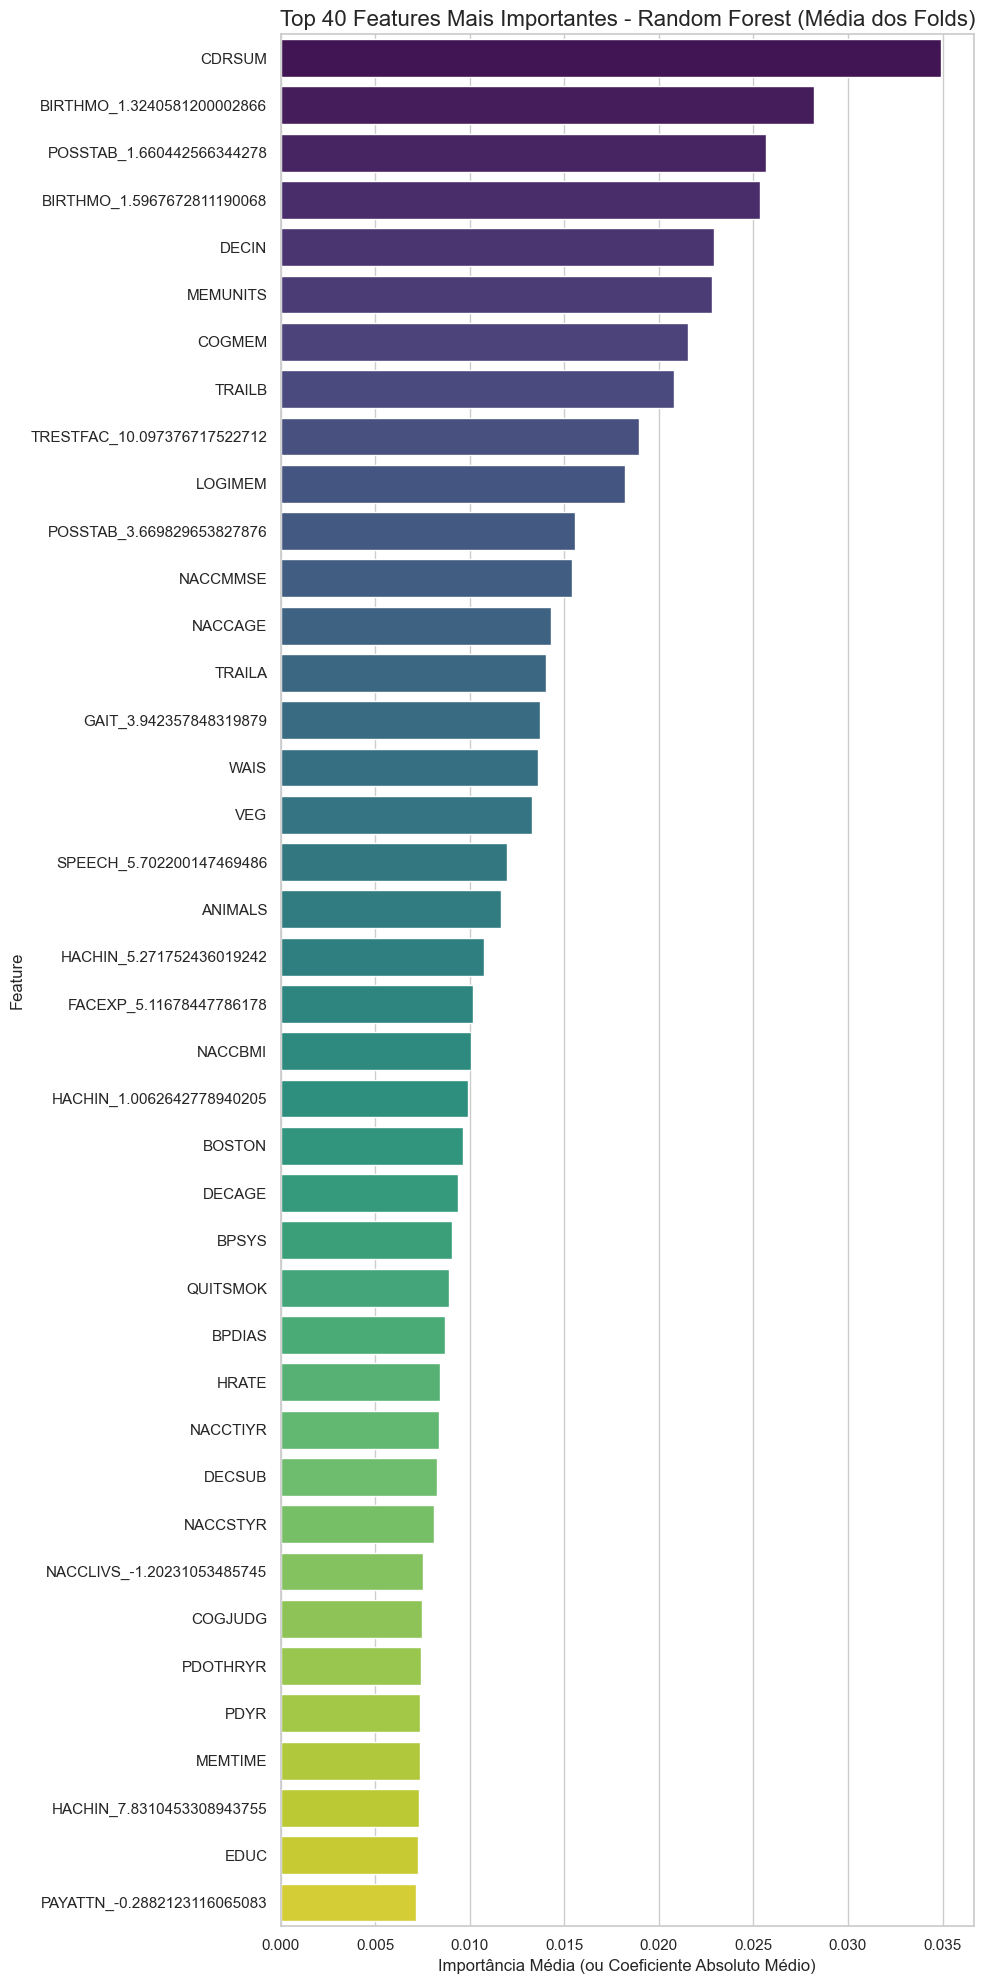

/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1783611036.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


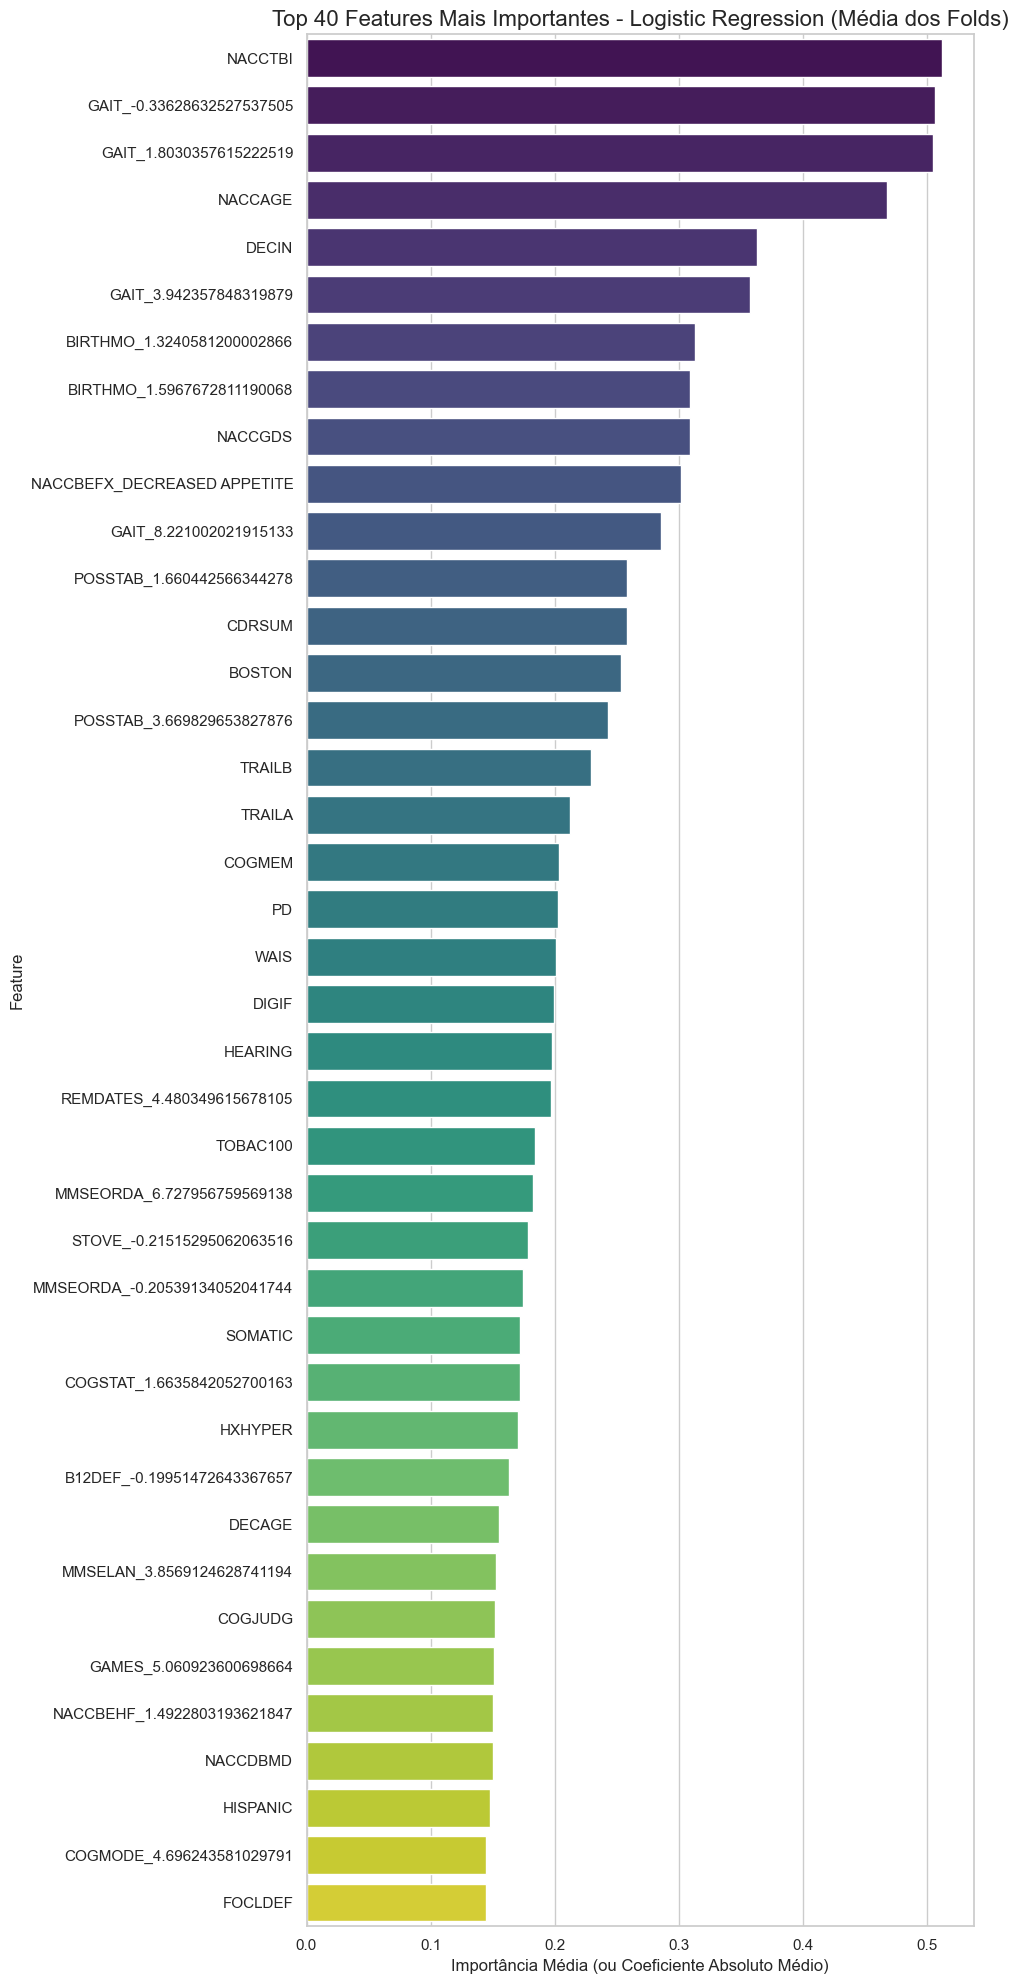

/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1783611036.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


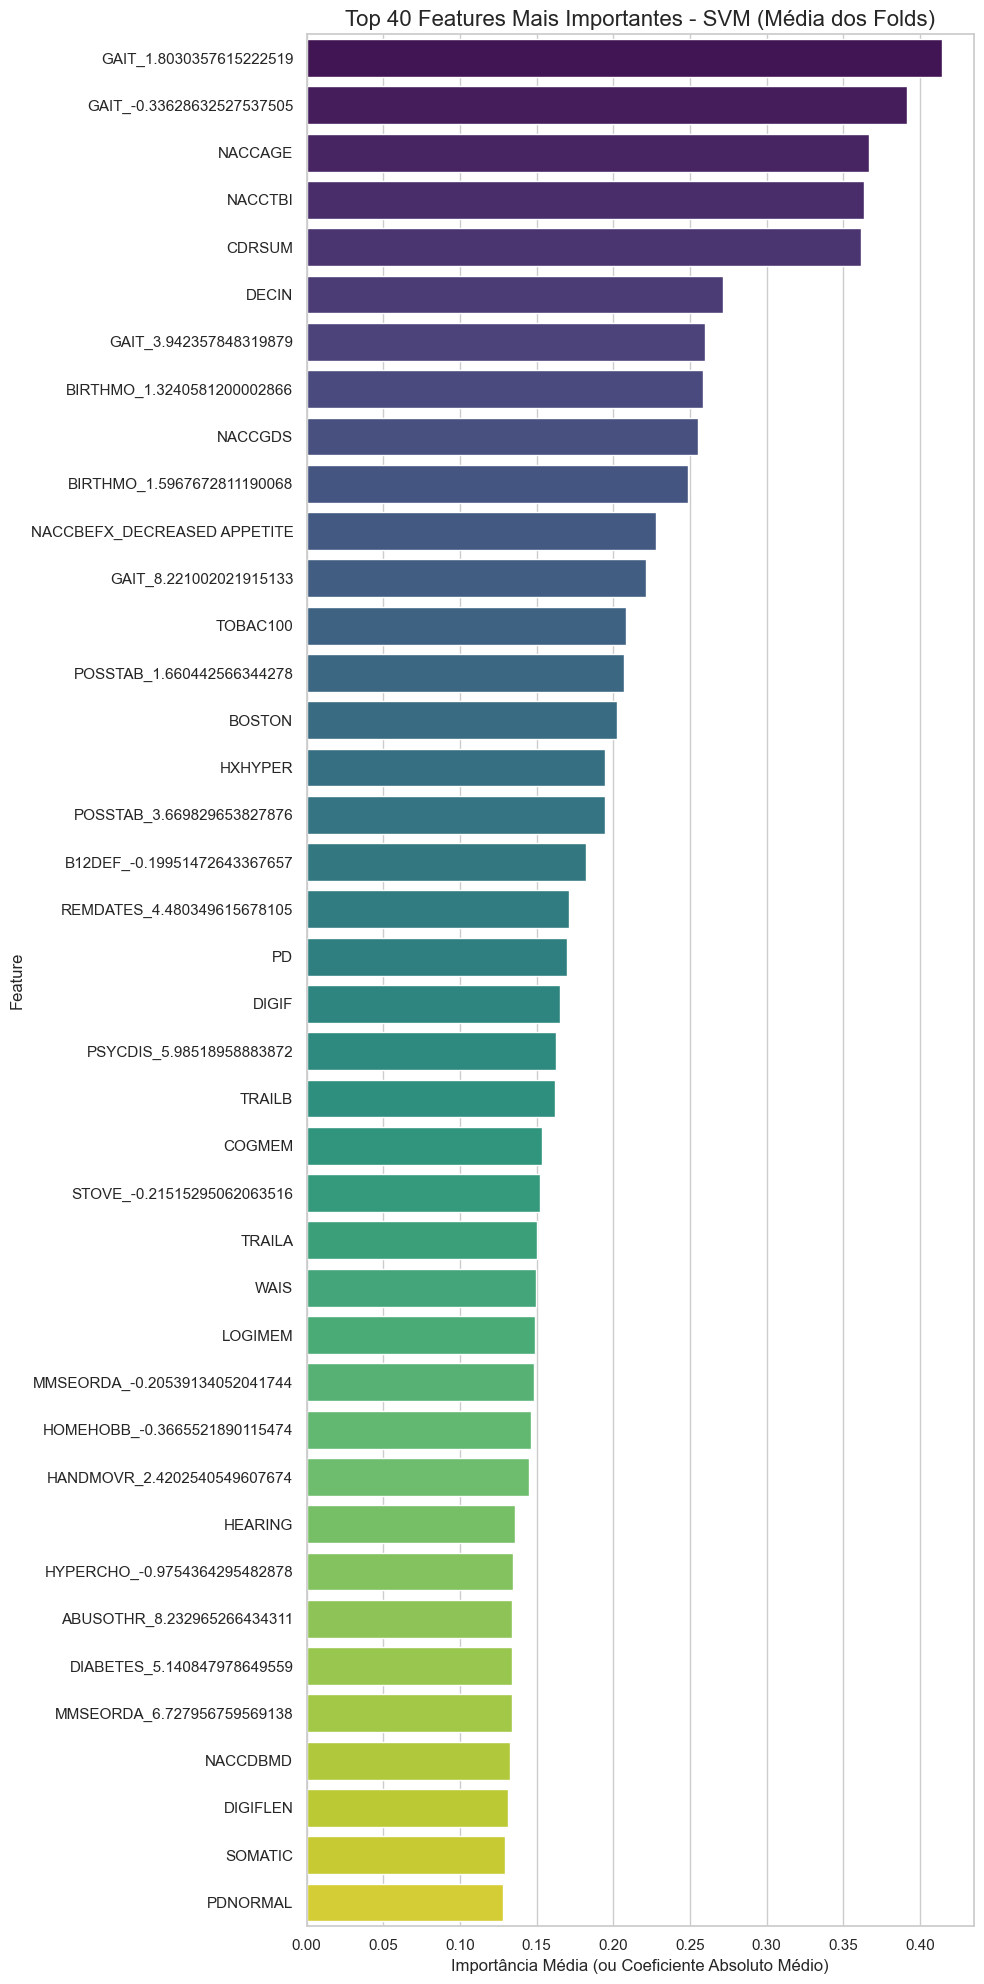

/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1783611036.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


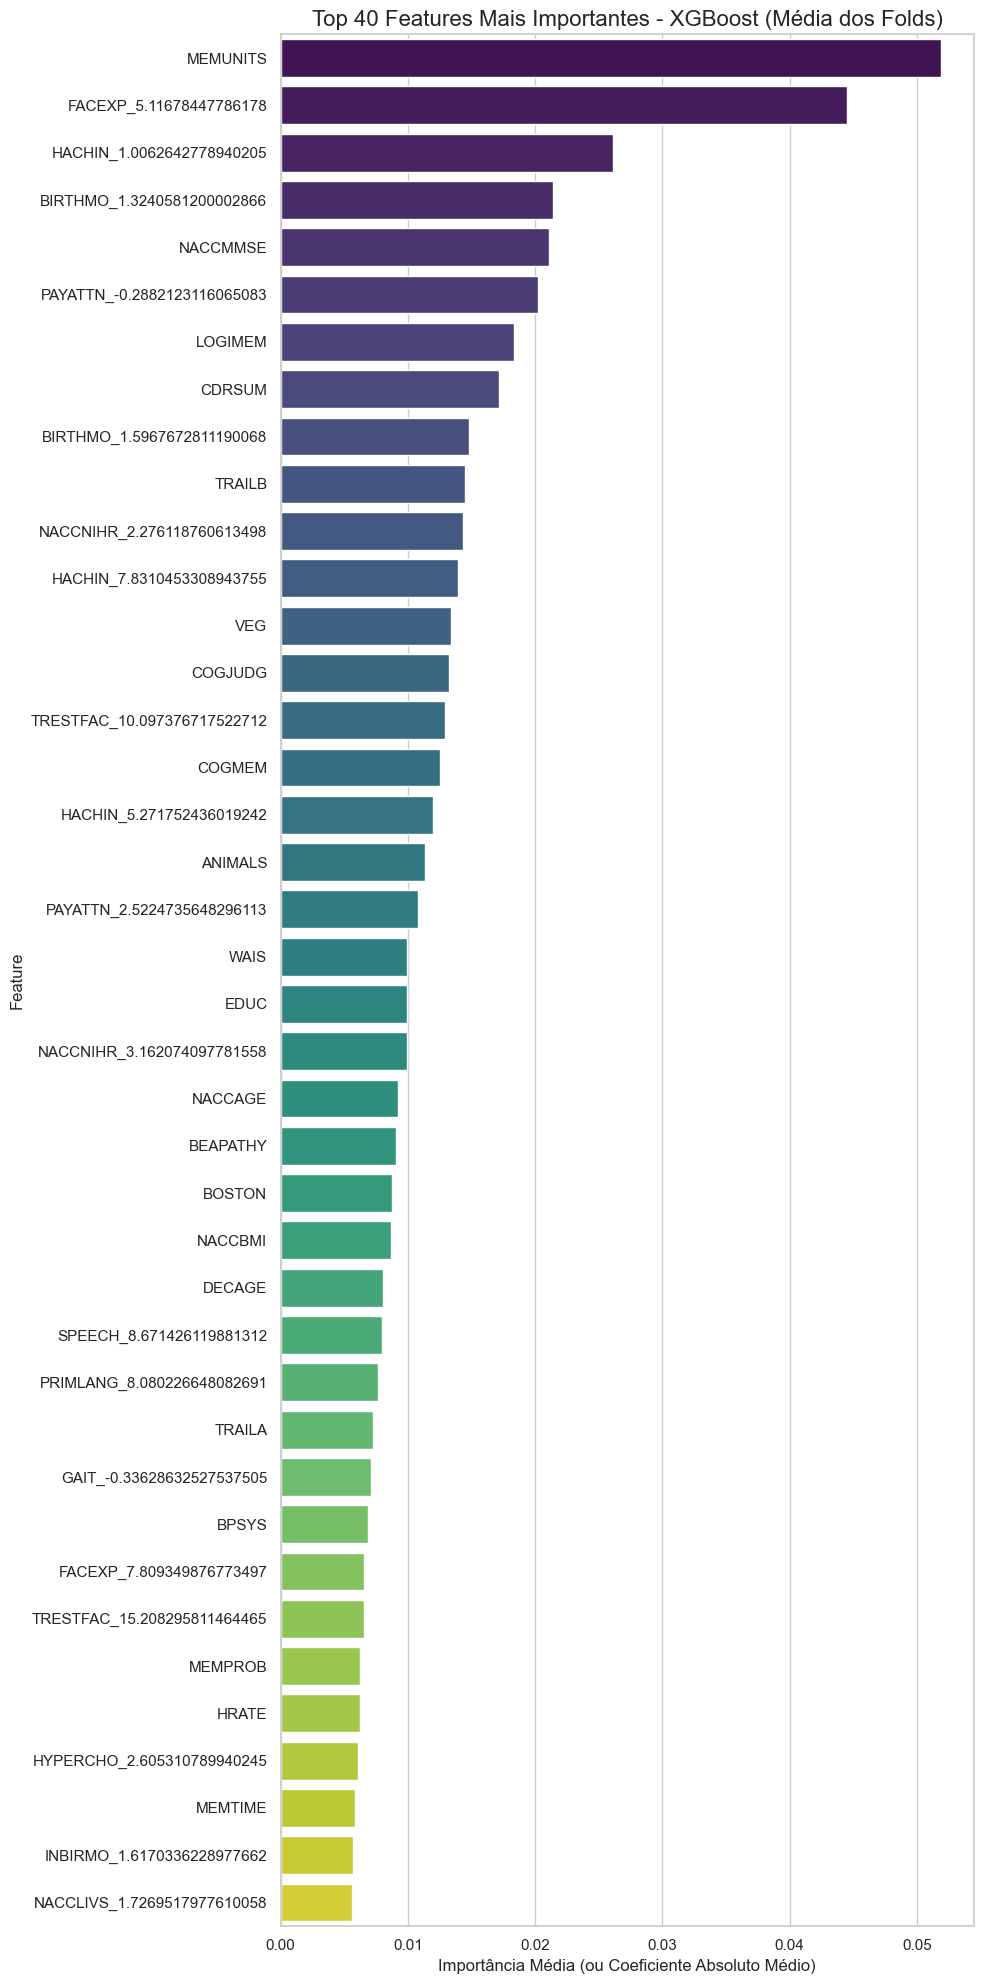

In [ ]:
def analyze_and_plot_feature_importance(model_name, feature_importances_list, variable_names, top_n=40):
    """ Calcula importância média, ordena e plota as top N features. """
    try:
        # calcula a media das importancias/coeficientes absolutos nos folds
        mean_importances = np.nanmean(np.abs(np.array(feature_importances_list)), axis=0)

        if np.all(np.isnan(mean_importances)):
             print(f"⚠️ Não foi possível calcular a importância média para {model_name}.")
             return None, None

        feature_importance_df = pd.DataFrame({
            'Feature': variable_names,
            'Importance': mean_importances
        })

        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

        plt.figure(figsize=(10, max(8, top_n // 2))) 
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
        plt.title(f'Top {top_n} Features Mais Importantes - {model_name} (Média dos Folds)', fontsize=16)
        plt.xlabel('Importância Média (ou Coeficiente Absoluto Médio)', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()

        return feature_importance_df

    except Exception as e:
        print(f"❌ Erro ao analisar importância das features para {model_name}: {e}")
        return None, None

print("\n--- Análise de Importância das Features ---")

try: top_rf_features = analyze_and_plot_feature_importance('Random Forest', rf_feature_importances, final_variable_names)
except NameError: print("Variáveis de RF não encontradas para análise de features.")

try: top_lr_features = analyze_and_plot_feature_importance('Logistic Regression', lr_feature_importances, final_variable_names)
except NameError: print("Variáveis de LR não encontradas para análise de features.")

try: top_svm_features = analyze_and_plot_feature_importance('SVM', svm_feature_importances, final_variable_names)
except NameError: print("Variáveis de SVM não encontradas para análise de features.")

try: top_xgb_features = analyze_and_plot_feature_importance('XGBoost', gb_feature_importances, final_variable_names)
except NameError: print("Variáveis de XGB não encontradas para análise de features.")


In [ ]:

# AUC × NÚMERO DE FEATURES (com Bootstrap)

def bootstrap_auc(probs, true, n_iter=1000, sample_size=1000, rng=None):
    if rng is None:
        rng = np.random.default_rng(42)
    auc_vals = []
    true = np.asarray(true)
    probs = np.asarray(probs)
    n = len(true)
    m = min(sample_size, n)
    for _ in range(n_iter):
        idx = rng.integers(0, n, size=m)
        try:
            auc_vals.append(roc_auc_score(true[idx], probs[idx]))
        except ValueError:
            continue
    if not auc_vals:
        return np.nan, np.nan, np.nan
    auc_vals = np.array(auc_vals)
    return np.percentile(auc_vals, 25), np.median(auc_vals), np.percentile(auc_vals, 75)

def auc_vs_features_cv(models, feature_importances, X_data, y_data,
                       n_features=40, n_splits=5, n_bootstrap=1000, random_state=42):
    """
    Calcula AUC × #features **sem vazamento**:
    - ordena features por importância média (|coef| ou importâncias)
    - para k=1..n_features, faz StratifiedKFold
      * em cada fold, clona o melhor modelo daquele fold
      * treina no train (apenas top-k colunas)
      * prediz no test e acumula probabilidades reais
    - ao final de cada k, calcula AUC global + IC via bootstrap
    """
    feat_mean = np.nanmean(np.abs(np.array(feature_importances)), axis=0)
    order = np.argsort(-feat_mean) 

    auc_list, low_list, med_list, high_list = [], [], [], []

    assert len(models) == n_splits, "Esperava 1 melhor modelo por fold."

    for k in range(1, n_features + 1):
        selected = order[:k]
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

        all_probs, all_true = [], []

        fold_idx = 0
        for train_idx, test_idx in skf.split(X_data, y_data):
            mdl = clone(models[fold_idx])  
            X_tr = X_data[train_idx][:, selected]
            X_te = X_data[test_idx][:, selected]
            y_tr, y_te = y_data[train_idx], y_data[test_idx]

            try:
                probs = mdl.fit(X_tr, y_tr).predict_proba(X_te)[:, 1]
            except AttributeError:
                decision = mdl.fit(X_tr, y_tr).decision_function(X_te)
                probs = (decision - decision.min()) / (decision.max() - decision.min() + 1e-9)

            all_probs.extend(probs)
            all_true.extend(y_te)
            fold_idx += 1

        # AUC sem vazamento (somente testes concatenados)
        auc_k = roc_auc_score(all_true, all_probs)
        l, m, h = bootstrap_auc(np.array(all_probs), np.array(all_true), n_iter=n_bootstrap)

        auc_list.append(auc_k)
        low_list.append(l)
        med_list.append(m)
        high_list.append(h)

    return auc_list, low_list, med_list, high_list




🔄 Recarregando resultados do Random Forest...
✅ Resultados do Random Forest carregados com sucesso!
 - Folds: 5
 - Features por modelo: 616

=== Random Forest: AUC × Número de Features ===
💾 Resultados salvos em '5fold/rf_auc_low_hi_med.npy'.


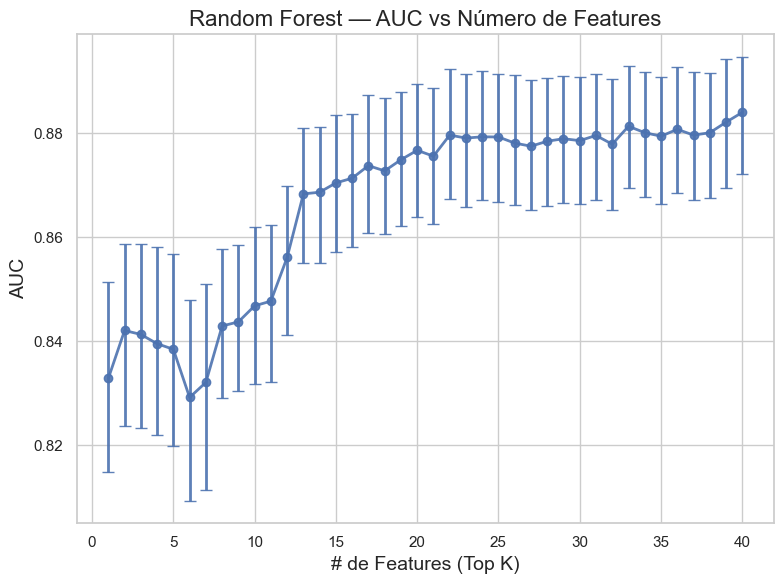

In [ ]:
#carregar resultados(random forest)

print("🔄 Recarregando resultados do Random Forest...")

try:
    with open('5fold/rf_results.pkl', 'rb') as f:
        [rf_auc, rf_metrics, rf_best_models, rf_err,
         rf_feature_importances, rf_probs, rf_preds, variables] = pickle.load(f)
    print("✅ Resultados do Random Forest carregados com sucesso!")
    print(f" - Folds: {len(rf_best_models)}")
    print(f" - Features por modelo: {len(rf_feature_importances[0])}")
except FileNotFoundError:
    print("❌ Erro: arquivo '5fold/rf_results.pkl' não encontrado. Rode o bloco do RF primeiro.")
try:
    print("\n=== Random Forest: AUC × Número de Features ===")
    auc_vals, low, med, high = auc_vs_features_cv(
    models=rf_best_models,
    feature_importances=rf_feature_importances,
    X_data=X_final,
    y_data=y_final,
    n_features=40,
    n_splits=5,
    n_bootstrap=1000
)


    np.save('5fold/rf_auc_low_hi_med.npy', [auc_vals, low, med, high])
    print("💾 Resultados salvos em '5fold/rf_auc_low_hi_med.npy'.")

    sns.set(style="whitegrid")
    x = list(range(1, len(auc_vals) + 1))
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        x, med,
        yerr=np.vstack((np.array(med) - np.array(low), np.array(high) - np.array(med))),
        fmt='-o', capsize=4, linewidth=2, alpha=0.9
    )
    plt.xlabel('# de Features (Top K)', fontsize=14)
    plt.ylabel('AUC', fontsize=14)
    plt.title('Random Forest — AUC vs Número de Features', fontsize=16)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Erro ao calcular AUC × número de features: {e}")


🔄 Recarregando resultados da Logistic Regression...
✅ Resultados da Logistic Regression carregados com sucesso!
 - Folds: 5
 - Features por modelo: 616

=== Logistic Regression: AUC × Número de Features ===
💾 Resultados salvos em '5fold/lr_auc_low_hi_med.npy'.


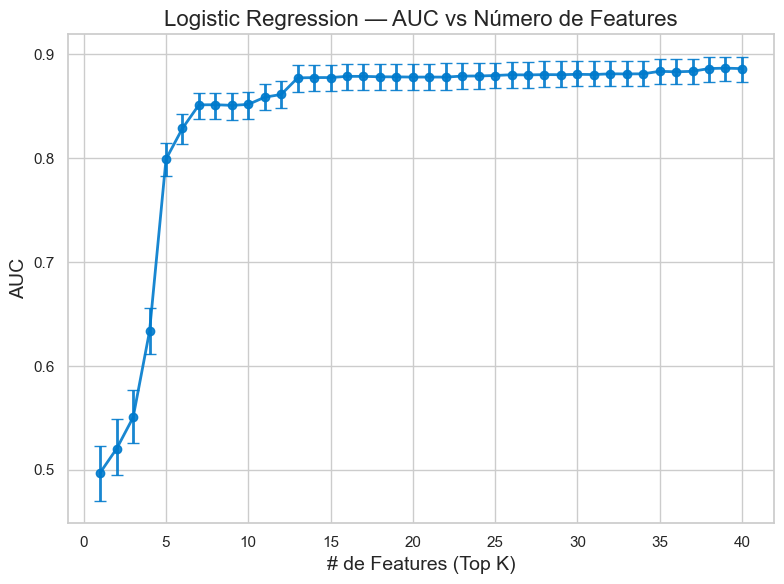

In [ ]:
#carregar resultados(logistic regression)

print("🔄 Recarregando resultados da Logistic Regression...")

try:
    with open('5fold/lr_results.pkl', 'rb') as f:
        [lr_auc, lr_metrics, lr_best_models, lr_err,
         lr_feature_importances, lr_probs, lr_preds, variables] = pickle.load(f)
    print("✅ Resultados da Logistic Regression carregados com sucesso!")
    print(f" - Folds: {len(lr_best_models)}")
    print(f" - Features por modelo: {len(lr_feature_importances[0])}")
except FileNotFoundError:
    print("❌ Erro: arquivo '5fold/lr_results.pkl' não encontrado. Rode o bloco da LR primeiro.")

try:
    print("\n=== Logistic Regression: AUC × Número de Features ===")
    auc_vals, low, med, high = auc_vs_features_cv(
    models=lr_best_models,                    
    feature_importances=lr_feature_importances, 
    X_data=X_final,
    y_data=y_final,
    n_features=40,    
    n_splits=5,        
    n_bootstrap=1000   
)


    np.save('5fold/lr_auc_low_hi_med.npy', [auc_vals, low, med, high])
    print("💾 Resultados salvos em '5fold/lr_auc_low_hi_med.npy'.")

    sns.set(style="whitegrid")
    x = list(range(1, len(auc_vals) + 1))
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        x, med,
        yerr=np.vstack((np.array(med) - np.array(low), np.array(high) - np.array(med))),
        fmt='-o', capsize=4, linewidth=2, alpha=0.9, color='#007ACC'
    )
    plt.xlabel('# de Features (Top K)', fontsize=14)
    plt.ylabel('AUC', fontsize=14)
    plt.title('Logistic Regression — AUC vs Número de Features', fontsize=16)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Erro ao calcular AUC × número de features (LR): {e}")


🔄 Recarregando resultados do SVM...
✅ Resultados do SVM carregados com sucesso!
 - Folds: 5
 - Features por modelo: 616

=== SVM (Linear): AUC × Número de Features ===
💾 Resultados salvos em '5fold/svm_auc_low_hi_med.npy'.


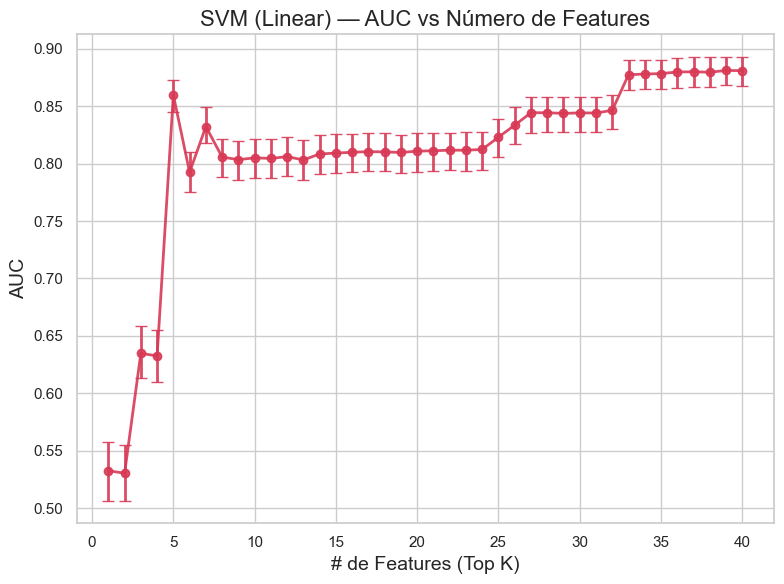

In [ ]:
#carregar resultados(SVM)

print("🔄 Recarregando resultados do SVM...")

try:
    with open('5fold/svm_results.pkl', 'rb') as f:
        [svm_auc, svm_metrics, svm_best_models, svm_err,
         svm_feature_importances, svm_probs, svm_preds, variables] = pickle.load(f)
    print("✅ Resultados do SVM carregados com sucesso!")
    print(f" - Folds: {len(svm_best_models)}")
    print(f" - Features por modelo: {len(svm_feature_importances[0])}")
except FileNotFoundError:
    print("❌ Erro: arquivo '5fold/svm_results.pkl' não encontrado. Rode o bloco do SVM primeiro.")

try:
    print("\n=== SVM (Linear): AUC × Número de Features ===")
    auc_vals, low, med, high = auc_vs_features_cv(
    models=svm_best_models,                   
    feature_importances=svm_feature_importances, 
    X_data=X_final,
    y_data=y_final,
    n_features=40,     
    n_splits=5,        
    n_bootstrap=1000   #
)

    np.save('5fold/svm_auc_low_hi_med.npy', [auc_vals, low, med, high])
    print("💾 Resultados salvos em '5fold/svm_auc_low_hi_med.npy'.")

    sns.set(style="whitegrid")
    x = list(range(1, len(auc_vals) + 1))
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        x, med,
        yerr=np.vstack((np.array(med) - np.array(low), np.array(high) - np.array(med))),
        fmt='-o', capsize=4, linewidth=2, alpha=0.9, color='#D83A56'
    )
    plt.xlabel('# de Features (Top K)', fontsize=14)
    plt.ylabel('AUC', fontsize=14)
    plt.title('SVM (Linear) — AUC vs Número de Features', fontsize=16)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Erro ao calcular AUC × número de features (SVM): {e}")


🔄 Recarregando resultados do Gradient Boosting (XGB)...
✅ Resultados do Gradient Boosting carregados com sucesso!
 - Folds: 5
 - Features por modelo: 616

=== Gradient Boosting (XGB): AUC × Número de Features ===
💾 Resultados salvos em '5fold/xgb_auc_low_hi_med.npy'.


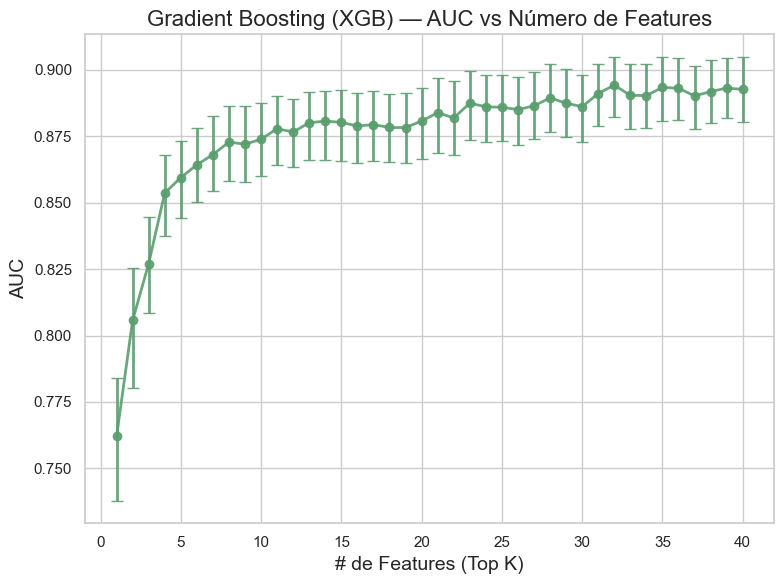

In [ ]:
#carregar resultados(Gradient Boosting)
print("🔄 Recarregando resultados do Gradient Boosting (XGB)...")

try:
    with open('5fold/xgb_results.pkl', 'rb') as f:
        [xgb_auc, xgb_metrics, xgb_best_models, xgb_err,
         xgb_feature_importances, xgb_probs, xgb_preds, variables] = pickle.load(f)
    print("✅ Resultados do Gradient Boosting carregados com sucesso!")
    print(f" - Folds: {len(xgb_best_models)}")
    print(f" - Features por modelo: {len(xgb_feature_importances[0])}")
except FileNotFoundError:
    print("❌ Erro: arquivo '5fold/xgb_results.pkl' não encontrado. Rode o bloco do XGB primeiro.")

try:
    print("\n=== Gradient Boosting (XGB): AUC × Número de Features ===")
    auc_vals, low, med, high = auc_vs_features_cv(
    models=xgb_best_models,                    
    feature_importances=xgb_feature_importances,  
    X_data=X_final,
    y_data=y_final,
    n_features=40,    
    n_splits=5,       
    n_bootstrap=1000   
)

    np.save('5fold/xgb_auc_low_hi_med.npy', [auc_vals, low, med, high])
    print("💾 Resultados salvos em '5fold/xgb_auc_low_hi_med.npy'.")

    sns.set(style="whitegrid")
    x = list(range(1, len(auc_vals) + 1))
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        x, med,
        yerr=np.vstack((np.array(med) - np.array(low), np.array(high) - np.array(med))),
        fmt='-o', capsize=4, linewidth=2, alpha=0.9, color='#5A9E6F'
    )
    plt.xlabel('# de Features (Top K)', fontsize=14)
    plt.ylabel('AUC', fontsize=14)
    plt.title('Gradient Boosting (XGB) — AUC vs Número de Features', fontsize=16)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Erro ao calcular AUC × número de features (XGB): {e}")


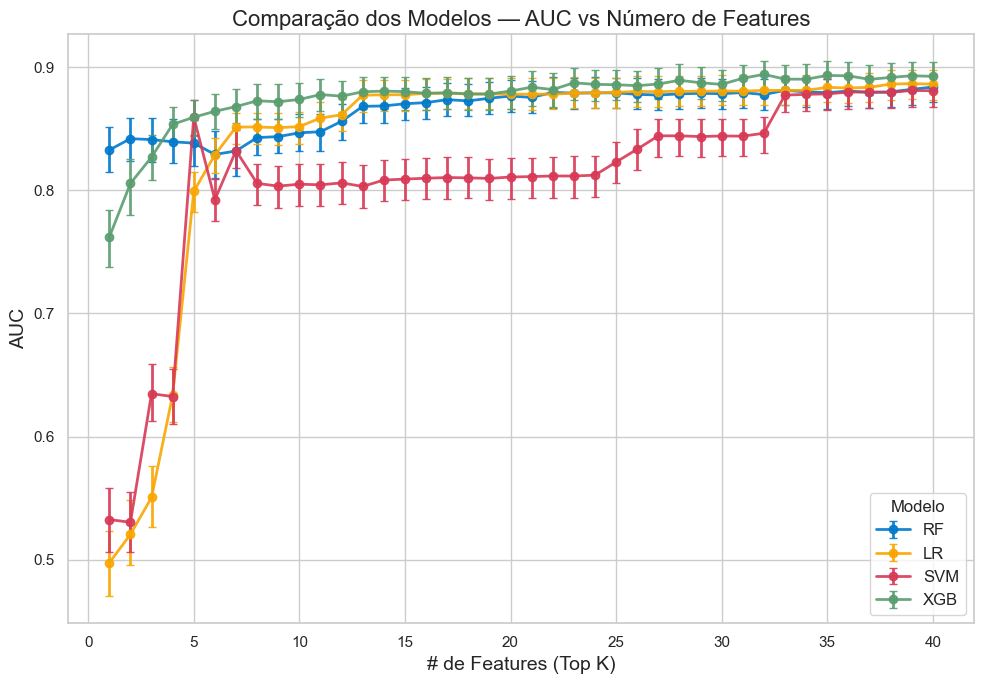

In [ ]:
#comparação das AUC

sns.set(style="whitegrid")

models = ['RF', 'LR', 'SVM', 'XGB']
colors = {
    'RF': '#007ACC',
    'LR': '#F9A602',
    'SVM': '#D83A56',
    'XGB': '#5A9E6F'
}
files = {
    'RF': '5fold/rf_auc_low_hi_med.npy',
    'LR': '5fold/lr_auc_low_hi_med.npy',
    'SVM': '5fold/svm_auc_low_hi_med.npy',
    'XGB': '5fold/xgb_auc_low_hi_med.npy'
}

plt.figure(figsize=(10, 7))

for model in models:
    try:
        auc_vals, low, med, high = np.load(files[model], allow_pickle=True)
        x = list(range(1, len(med) + 1))
        plt.errorbar(
            x, med,
            yerr=np.vstack((np.array(med) - np.array(low), np.array(high) - np.array(med))),
            fmt='-o',
            capsize=3,
            linewidth=2,
            alpha=0.9,
            color=colors[model],
            label=model
        )
    except FileNotFoundError:
        print(f"⚠️ Arquivo {files[model]} não encontrado, pulando {model}.")

plt.xlabel('# de Features (Top K)', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.title('Comparação dos Modelos — AUC vs Número de Features', fontsize=16)
plt.legend(title='Modelo', fontsize=12)
plt.tight_layout()
plt.show()


### TOP 6 VARIABLES

In [ ]:
#modelos usando apenas 6 variaveis mais importantes

top_vars = ['MEMORY', 'TRAILB', 'DECIN', 'ORIENT', 'HOMEHOBB', 'INDEPEND']

with open('processed_data.pkl', 'rb') as f:
    [data, variables, outcome] = pickle.load(f)

df = pd.DataFrame(data, columns=variables)

X_top = df[top_vars].copy()
y_top = np.array(outcome, dtype=int)

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_top_encoded = enc.fit_transform(X_top)
top_feature_names = enc.get_feature_names_out(top_vars)

scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top_encoded)

print(f"✅ Dataset Top Variáveis pronto: {X_top_scaled.shape}")


✅ Dataset Top Variáveis pronto: (15974, 302)


In [114]:
print("Colunas disponíveis no dataset:")
print(list(df.columns))


Colunas disponíveis no dataset:
['NACCREAS', 'NACCREFR', 'BIRTHMO', 'SEX', 'HISPANIC', 'HISPOR', 'PRIMLANG', 'EDUC', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'MARISTAT', 'HANDED', 'NACCAGE', 'NACCNIHR', 'INBIRMO', 'INSEX', 'INRELTO', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCMOM', 'NACCDAD', 'NACCFAM', 'ANYMEDS', 'NACCAMD', 'NACCHTNC', 'NACCACEI', 'NACCAAAS', 'NACCBETA', 'NACCCCBS', 'NACCDIUR', 'NACCVASD', 'NACCANGI', 'NACCAHTN', 'NACCLIPL', 'NACCNSD', 'NACCAC', 'NACCADEP', 'NACCAPSY', 'NACCAANX', 'NACCPDMD', 'NACCEMD', 'NACCEPMD', 'NACCDBMD', 'BPSYS', 'BPDIAS', 'HRATE', 'VISION', 'VISCORR', 'VISWCORR', 'HEARING', 'HEARAID', 'HEARWAID', 'NACCBMI', 'ABRUPT', 'STEPWISE', 'SOMATIC', 'EMOT', 'CVHATT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACE', 'CVCHF', 'CVOTHR', 'CBSTROKE', 'NACCSTYR', 'CBTIA', 'NACCTIYR', 'PD', 'PDYR', 'PDOTHR', 'PDOTHRYR', 'SEIZURES', 'TRAUMBRF', 'TRAUMEXT', 'TRAUMCHR', 'NCOTHR', 'HYPERTEN', 'HYPERCHO', 'DIABETES', 'B12DEF', 'THYROID', 'INCONTU', 'INCONTF', 'DEP2YRS',

### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10],
    'max_depth': [10, 50],
    'max_features': ['sqrt', 'log2']
}

(rf_top_cv_df, rf_top_mean, rf_top_models,
 rf_top_err, rf_top_feat,
 rf_top_preds, rf_top_probs, rf_top_true) = run_full_cv_evaluation(
    model_instance=RandomForestClassifier(random_state=42, n_jobs=-1),
    model_name='RF_TOP',
    param_grid=rf_param_grid,
    X_data=X_top_scaled,
    y_data=y_top,
    variable_names=top_feature_names,
    n_splits=5,
    n_bootstrap_iter=1000
)

print("\n=== Random Forest (Top Variables) ===")
display(rf_top_mean.round(3))

with open('5fold/rf_results_top.pkl', 'wb') as f:
    pickle.dump([
        rf_top_cv_df['auc'].tolist(),
        rf_top_cv_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(),
        rf_top_models, rf_top_err, rf_top_feat,
        rf_top_probs, rf_top_preds, top_feature_names
    ], f)



--- Iniciando Avaliação Completa para: RF_TOP ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood 

    Bootstrap concluído.
  Fold 1 concluído em 17.64 segundos.
    Métricas Fold 1: Acc=0.941, AUC=0.869
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood 

    Bootstrap concluído.
  Fold 2 concluído em 16.26 segundos.
    Métricas Fold 2: Acc=0.941, AUC=0.853
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood 

    Bootstrap concluído.
  Fold 3 concluído em 17.16 segundos.
    Métricas Fold 3: Acc=0.941, AUC=0.865
  Iniciando Fold 4/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood 

    Bootstrap concluído.
  Fold 4 concluído em 17.03 segundos.
    Métricas Fold 4: Acc=0.941, AUC=0.864
  Iniciando Fold 5/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood 

    Bootstrap concluído.
  Fold 5 concluído em 17.33 segundos.
    Métricas Fold 5: Acc=0.941, AUC=0.848
--- Avaliação Completa para RF_TOP concluída em 85.43 segundos ---

=== Random Forest (Top Variables) ===


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood 

accuracy                      0.941
sensitivity                   0.000
specificity                   1.000
positive_likelihood             NaN
negative_likelihood           1.000
false_postive_rate            0.000
false_negative_rate           1.000
positive_predictive_value       NaN
negative_predicitive_value    0.941
positive_rate                 0.000
auc                           0.860
fold                          3.000
dtype: float64

### Logistic regression

In [116]:
from sklearn.linear_model import LogisticRegression

lr_param_grid = {
    'C': [0.1, 1, 5, 10],
    'max_iter': [10000],
    'solver': ['liblinear', 'lbfgs']
}

(lr_top_cv_df, lr_top_mean, lr_top_models,
 lr_top_err, lr_top_feat,
 lr_top_preds, lr_top_probs, lr_top_true) = run_full_cv_evaluation(
    model_instance=LogisticRegression(random_state=42, max_iter=10000),
    model_name='LR_TOP',
    param_grid=lr_param_grid,
    X_data=X_top_scaled,
    y_data=y_top,
    variable_names=top_feature_names,
    n_splits=5,
    n_bootstrap_iter=1000
)

print("\n=== Logistic Regression (Top Variables) ===")
display(lr_top_mean.round(3))

with open('5fold/lr_results_top.pkl', 'wb') as f:
    pickle.dump([
        lr_top_cv_df['auc'].tolist(),
        lr_top_cv_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(),
        lr_top_models, lr_top_err, lr_top_feat,
        lr_top_probs, lr_top_preds, top_feature_names
    ], f)



--- Iniciando Avaliação Completa para: LR_TOP ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 4.16 segundos.
    Métricas Fold 1: Acc=0.936, AUC=0.839
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 3.84 segundos.
    Métricas Fold 2: Acc=0.937, AUC=0.827
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 3 concluído em 4.14 se

/Users/eduardafigueredo/UDS/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 4 concluído em 3.98 segundos.
    Métricas Fold 4: Acc=0.938, AUC=0.827
  Iniciando Fold 5/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'max_iter': 10000, 'solver': 'liblinear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 5 concluído em 4.30 segundos.
    Métricas Fold 5: Acc=0.938, AUC=0.799
--- Avaliação Completa para LR_TOP concluída em 20.43 segundos ---

=== Logistic Regression (Top Variables) ===


accuracy                      0.938
sensitivity                   0.048
specificity                   0.993
positive_likelihood           7.058
negative_likelihood           0.959
false_postive_rate            0.007
false_negative_rate           0.952
positive_predictive_value     0.302
negative_predicitive_value    0.944
positive_rate                 0.009
auc                           0.824
fold                          3.000
dtype: float64

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_sub, _, y_sub, _ = train_test_split(X_top_scaled, y_top, 
                                      stratify=y_top, test_size=0.8, random_state=42)

svm_param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10]
}

(svm_top_cv_df, svm_top_mean, svm_top_models,
 svm_top_err, svm_top_feat,
 svm_top_preds, svm_top_probs, svm_top_true) = run_full_cv_evaluation(
    model_instance=SVC(probability=True, random_state=42, class_weight='balanced'),
    model_name='SVM_TOP',
    param_grid=svm_param_grid,
    X_data=X_sub,
    y_data=y_sub,
    variable_names=top_feature_names,
    n_splits=5,
    n_bootstrap_iter=1000

)

print("\n=== SVM (Top Variables) ===")
display(svm_top_mean.round(3))

with open('5fold/svm_results_top.pkl', 'wb') as f:
    pickle.dump([
        svm_top_cv_df['auc'].tolist(),
        svm_top_cv_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(),
        svm_top_models, svm_top_err, svm_top_feat,
        svm_top_probs, svm_top_preds, top_feature_names
    ], f)



--- Iniciando Avaliação Completa para: SVM_TOP ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 15.41 segundos.
    Métricas Fold 1: Acc=0.817, AUC=0.804
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 1, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 14.11 segundos.
    Métricas Fold 2: Acc=0.858, AUC=0.794
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'C': 10, 'kernel': 'linear'}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 3 concluído em 50.61 segundos.
    Métricas Fold 3: Acc=0.836, AUC=0.762
  Iniciando Fol

accuracy                      0.834
sensitivity                   0.511
specificity                   0.855
positive_likelihood           3.550
negative_likelihood           0.572
false_postive_rate            0.145
false_negative_rate           0.489
positive_predictive_value     0.181
negative_predicitive_value    0.965
positive_rate                 0.167
auc                           0.772
fold                          3.000
dtype: float64

### Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5, 10],
    'max_depth': [5, 10, 50],
    'max_features': ['sqrt', 'log2', None]
}

(gb_top_cv_df, gb_top_mean, gb_top_models,
 gb_top_err, gb_top_feat,
 gb_top_preds, gb_top_probs, gb_top_true) = run_full_cv_evaluation(
    model_instance=GradientBoostingClassifier(random_state=42),
    model_name='GB_TOP',
    param_grid=gb_param_grid,
    X_data=X_top_scaled,
    y_data=y_top,
    variable_names=top_feature_names,
    n_splits=5,
    n_bootstrap_iter=1000
)

print("\n=== Gradient Boosting (Top Variables) ===")
display(gb_top_mean.round(3))

with open('5fold/xgb_results_top.pkl', 'wb') as f:
    pickle.dump([
        gb_top_cv_df['auc'].tolist(),
        gb_top_cv_df.drop(columns=['fold', 'best_params']).round(5).values.tolist(),
        gb_top_models, gb_top_err, gb_top_feat,
        gb_top_probs, gb_top_preds, top_feature_names
    ], f)



--- Iniciando Avaliação Completa para: GB_TOP ---
  Iniciando Fold 1/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 1 concluído em 338.14 segundos.
    Métricas Fold 1: Acc=0.940, AUC=0.866
  Iniciando Fold 2/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 2 concluído em 337.08 segundos.
    Métricas Fold 2: Acc=0.941, AUC=0.845
  Iniciando Fold 3/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métrica

/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)


    Bootstrap concluído.
  Fold 3 concluído em 337.04 segundos.
    Métricas Fold 3: Acc=0.942, AUC=0.856
  Iniciando Fold 4/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...
    Bootstrap concluído.
  Fold 4 concluído em 332.41 segundos.
    Métricas Fold 4: Acc=0.940, AUC=0.862
  Iniciando Fold 5/5...
    Ajustando GridSearchCV...
    Melhores Parâmetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
    Fazendo previsões...
    Calculando métricas...
    Executando bootstrap (1000 iterações)...


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  positive_likelihood = sensitivity / (1 

    Bootstrap concluído.
  Fold 5 concluído em 324.99 segundos.
    Métricas Fold 5: Acc=0.941, AUC=0.841
--- Avaliação Completa para GB_TOP concluída em 1669.67 segundos ---

=== Gradient Boosting (Top Variables) ===


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:33: RuntimeWarning: invalid value encountered in scalar divide
  positive_likelihood = sensitivity / (1 - specificity)
/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1227401296.py:37: RuntimeWarning: invalid value encountered in scalar divide
  positive_predictive_value = np.sum(true_positives) / np.sum(test_positives)


accuracy                       0.941
sensitivity                    0.027
specificity                    0.998
positive_likelihood           12.749
negative_likelihood            0.976
false_postive_rate             0.002
false_negative_rate            0.973
positive_predictive_value      0.415
negative_predicitive_value     0.943
positive_rate                  0.004
auc                            0.854
fold                           3.000
dtype: float64

### Analises


In [ ]:
def load_mean_results(path):
    try:
        with open(path, 'rb') as f:
            data = pickle.load(f)
        metrics = np.array(data[1])          
        mean_metrics = np.nanmean(metrics, axis=0)
        return mean_metrics
    except Exception as e:
        print(f"Erro ao carregar {path}: {e}")
        return np.array([]) 

paths_full = {
    'LR': '5fold/lr_results.pkl',
    'SVM': '5fold/svm_results.pkl',
    'RF': '5fold/rf_results.pkl',
    'GB': '5fold/xgb_results.pkl'
}
paths_top = {
    'LR': '5fold/lr_results_top.pkl',
    'SVM': '5fold/svm_results_top.pkl',
    'RF': '5fold/rf_results_top.pkl',
    'GB': '5fold/xgb_results_top.pkl'
}

results_full = {m: load_mean_results(p) for m, p in paths_full.items()}
results_top  = {m: load_mean_results(p) for m, p in paths_top.items()}

metric_names_base = [
    'Accuracy', 'Sensitivity', 'Specificity',
    'Positive Likelihood', 'Negative Likelihood',
    'False Positive Rate', 'False Negative Rate',
    'PPV', 'NPV', 'Positive Rate'
]

all_vecs = [v for v in list(results_full.values()) + list(results_top.values()) if v.size > 0]
max_len = max((len(v) for v in all_vecs), default=10)
has_auc = (max_len == 11)

metric_names = metric_names_base + (['AUC'] if has_auc else [])

def normalize(vec, target_len):
    if vec.size == 0:
        return np.full(target_len, np.nan)
    if len(vec) == target_len:
        return vec
    if len(vec) > target_len:
        return vec[:target_len]
    # menor: completa com NaN
    return np.pad(vec, (0, target_len - len(vec)), constant_values=np.nan)

results_full = {k: normalize(v, len(metric_names)) for k, v in results_full.items()}
results_top  = {k: normalize(v, len(metric_names)) for k, v in results_top.items()}

df_full = pd.DataFrame(results_full, index=metric_names)
df_top  = pd.DataFrame(results_top,  index=metric_names)

comparison_df = pd.concat({
    'All Variables': df_full,
    'Top 6 Variables': df_top
}, axis=1)

print("\n=== MÉTRICAS MÉDIAS (5-FOLD) — COMPARAÇÃO ENTRE COMPLETO E TOP 6 VARIÁVEIS ===")
display(comparison_df.round(3))

summary_df = comparison_df.loc[['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV']]
print("\n=== MÉTRICAS PRINCIPAIS — RESUMO ===")
display(summary_df.round(3))



=== MÉTRICAS MÉDIAS (5-FOLD) — COMPARAÇÃO ENTRE COMPLETO E TOP 6 VARIÁVEIS ===


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/3582235254.py:10: RuntimeWarning: Mean of empty slice
  mean_metrics = np.nanmean(metrics, axis=0)


All Variables                        Top 6 Variables                      
                               LR    SVM      RF      GB              LR    SVM     RF      GB
Accuracy                    0.828  0.817   0.935   0.940           0.938  0.834  0.941   0.941
Sensitivity                 0.682  0.678   0.190   0.088           0.048  0.511  0.000   0.027
Specificity                 0.837  0.825   0.981   0.993           0.993  0.855  1.000   0.998
Positive Likelihood         4.194  3.889  10.934  12.840           7.058  3.550    NaN  12.749
Negative Likelihood         0.380  0.390   0.825   0.918           0.959  0.572  1.000   0.976
False Positive Rate         0.163  0.175   0.019   0.007           0.007  0.145  0.000   0.002
False Negative Rate         0.318  0.322   0.810   0.912           0.952  0.489  1.000   0.973
PPV                         0.208  0.195   0.404   0.436           0.302  0.181    NaN   0.415
NPV                         0.977  0.976   0.951   0.946           0.944  0.965  0.941   0.943
Positive Rate               0.193  0.204   0.029   0.012           0.009  0.167  0.000   0.004
AUC                         0.841  0.831   0.893   0.893           0.824  0.772  0.860   0.854


=== MÉTRICAS PRINCIPAIS — RESUMO ===


All Variables                      Top 6 Variables                     
                       LR    SVM     RF     GB              LR    SVM     RF     GB
Accuracy            0.828  0.817  0.935  0.940           0.938  0.834  0.941  0.941
Sensitivity         0.682  0.678  0.190  0.088           0.048  0.511  0.000  0.027
Specificity         0.837  0.825  0.981  0.993           0.993  0.855  1.000  0.998
PPV                 0.208  0.195  0.404  0.436           0.302  0.181    NaN  0.415
NPV                 0.977  0.976  0.951  0.946           0.944  0.965  0.941  0.943

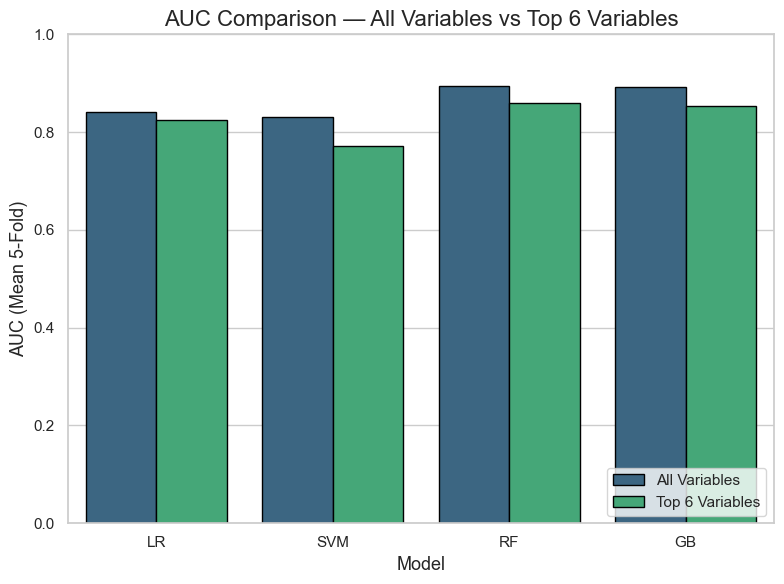


=== MÉDIAS DE AUC (5-FOLD) ===


Set    All Variables  Top 6 Variables
Model                                
GB             0.893            0.854
LR             0.841            0.824
RF             0.893            0.860
SVM            0.831            0.772

In [ ]:
# AUC (All Variables vs Top 6 Variables)

import matplotlib.pyplot as plt
import seaborn as sns

def extract_auc_from_results(path):
    try:
        with open(path, 'rb') as f:
            data = pickle.load(f)
        aucs = np.array(data[0])  
        return np.mean(aucs)
    except Exception as e:
        print(f"⚠️ Erro ao extrair AUC de {path}: {e}")
        return np.nan

auc_full = {m: extract_auc_from_results(p) for m, p in paths_full.items()}
auc_top = {m: extract_auc_from_results(p) for m, p in paths_top.items()}

df_auc = pd.DataFrame({
    'Model': list(auc_full.keys()) * 2,
    'AUC': list(auc_full.values()) + list(auc_top.values()),
    'Set': ['All Variables'] * len(auc_full) + ['Top 6 Variables'] * len(auc_top)
})

plt.figure(figsize=(8, 6))
sns.barplot(data=df_auc, x='Model', y='AUC', hue='Set', palette='viridis', edgecolor='black')
plt.title('AUC Comparison — All Variables vs Top 6 Variables', fontsize=16)
plt.ylabel('AUC (Mean 5-Fold)', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.ylim(0, 1)
plt.legend(title='', loc='lower right')
plt.tight_layout()
plt.show()

print("\n=== MÉDIAS DE AUC (5-FOLD) ===")
display(df_auc.pivot(index='Model', columns='Set', values='AUC').round(3))


/var/folders/tk/8h9c02552k389khjxlk1mh9h0000gn/T/ipykernel_28418/1305252846.py:16: RuntimeWarning: Mean of empty slice
  mean_metrics = np.nanmean(metrics, axis=0)


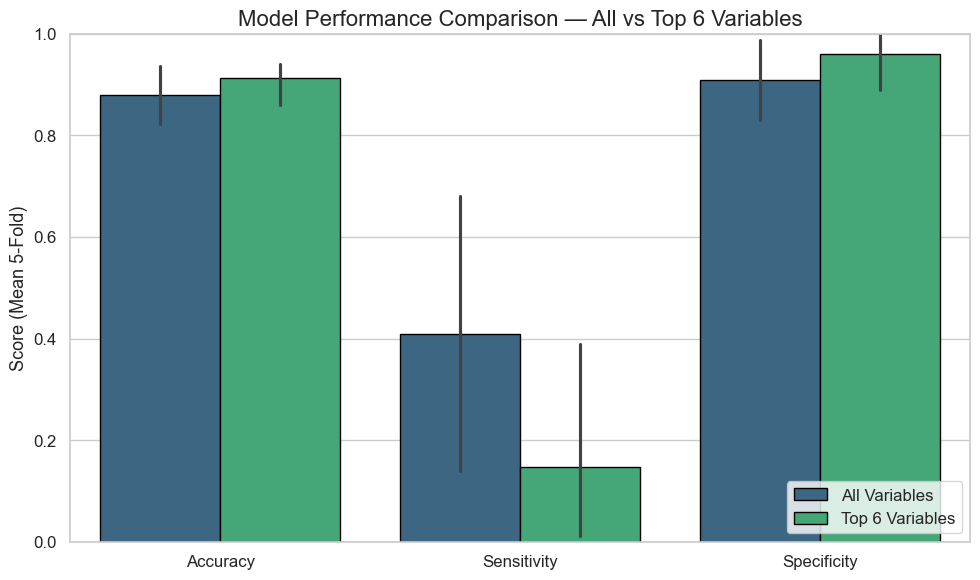


=== MÉDIAS DAS MÉTRICAS PRINCIPAIS ===


Set                All Variables  Top 6 Variables
Model Metric                                     
GB    Accuracy             0.940            0.941
      Sensitivity          0.088            0.027
      Specificity          0.993            0.998
LR    Accuracy             0.828            0.938
      Sensitivity          0.682            0.048
      Specificity          0.837            0.993
RF    Accuracy             0.935            0.941
      Sensitivity          0.190            0.000
      Specificity          0.981            1.000
SVM   Accuracy             0.817            0.834
      Sensitivity          0.678            0.511
      Specificity          0.825            0.855

In [ ]:
def extract_selected_metrics(path, selected_indices=[0, 1, 2]):
    try:
        with open(path, 'rb') as f:
            data = pickle.load(f)
        metrics = np.array(data[1])  #
        mean_metrics = np.nanmean(metrics, axis=0)
        return mean_metrics[selected_indices]  
    except Exception as e:
        print(f"⚠️ Erro ao carregar {path}: {e}")
        return np.full(len(selected_indices), np.nan)

selected_metrics = ['Accuracy', 'Sensitivity', 'Specificity']
metrics_full = {m: extract_selected_metrics(p) for m, p in paths_full.items()}
metrics_top = {m: extract_selected_metrics(p) for m, p in paths_top.items()}

rows = []
for model in metrics_full.keys():
    for i, metric_name in enumerate(selected_metrics):
        rows.append([model, metric_name, metrics_full[model][i], 'All Variables'])
        rows.append([model, metric_name, metrics_top[model][i], 'Top 6 Variables'])

df_metrics = pd.DataFrame(rows, columns=['Model', 'Metric', 'Value', 'Set'])

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_metrics,
    x='Metric', y='Value',
    hue='Set', palette='viridis',
    edgecolor='black'
)
plt.title('Model Performance Comparison — All vs Top 6 Variables', fontsize=16)
plt.ylabel('Score (Mean 5-Fold)', fontsize=13)
plt.xlabel('')
plt.ylim(0, 1)
plt.legend(title='', loc='lower right')
plt.tight_layout()
plt.show()

print("\n=== MÉDIAS DAS MÉTRICAS PRINCIPAIS ===")
display(df_metrics.pivot_table(values='Value', index=['Model', 'Metric'], columns='Set').round(3))


🔄 Carregando resultados dos modelos...
✅ Resultados carregados com sucesso!

📈 Gerando curvas ROC...


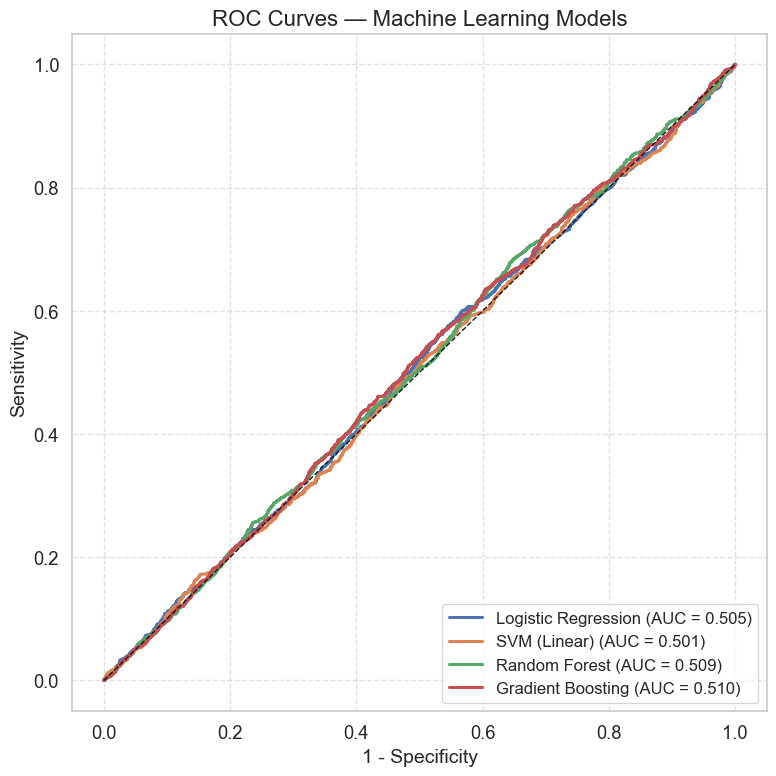

In [ ]:
# ROC CURVES — Comparação entre Modelos 
import warnings
warnings.filterwarnings('ignore')
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

sns.set(style="whitegrid", font_scale=1.2)

os.makedirs('5fold', exist_ok=True)

def load_data(model):
    path = f'5fold/{model}_results.pkl'
    with open(path, 'rb') as f:
        auc, metrics, models, err, feat, probs, preds, _vars = pkl.load(f)
    return auc, metrics, models, err, feat, probs, preds, _vars

print("🔄 Carregando resultados dos modelos...")
rf_auc, rf_metrics, rf_models, rf_err, rf_feat, rf_probs, rf_preds, variables = load_data('rf')
lr_auc, lr_metrics, lr_models, lr_err, lr_feat, lr_probs, lr_preds, variables = load_data('lr')
sv_auc, sv_metrics, sv_models, sv_err, sv_feat, sv_probs, sv_preds, variables = load_data('svm')
xg_auc, xg_metrics, xg_models, xg_err, xg_feat, xg_probs, xg_preds, variables = load_data('xgb')
print("✅ Resultados carregados com sucesso!\n")

data = np.load('encoded_data.npy')
outcome = np.load('outcome.npy')

from sklearn.model_selection import StratifiedKFold as skf
sk = skf(n_splits=5)
true = []
for train, test in sk.split(data, outcome):
    true.extend(outcome[test])
true = np.array(true)

def plot_roc_curves(true_values, probs_dict, title="ROC Curves — Machine Learning Models"):
    plt.figure(figsize=(8, 8))
    for model_name, probs in probs_dict.items():
        fpr, tpr, _ = roc_curve(true_values, probs)
        auc_value = roc_auc_score(true_values, probs)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_value:.3f})", linewidth=2.2)

    xx = np.linspace(0, 1, 100)
    plt.plot(xx, xx, 'k--', linewidth=1)

    # Eixos e título
    plt.xlabel("1 - Specificity", fontsize=14)
    plt.ylabel("Sensitivity", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

probs_dict = {
    'Logistic Regression': lr_probs,
    'SVM (Linear)': sv_probs,
    'Random Forest': rf_probs,
    'Gradient Boosting': xg_probs
}

print("📈 Gerando curvas ROC...")
plot_roc_curves(true, probs_dict)


🔄 Carregando resultados com todas as variáveis...
🔄 Carregando resultados com top variáveis...

📈 Gerando curvas comparativas (All vs Top 6)...


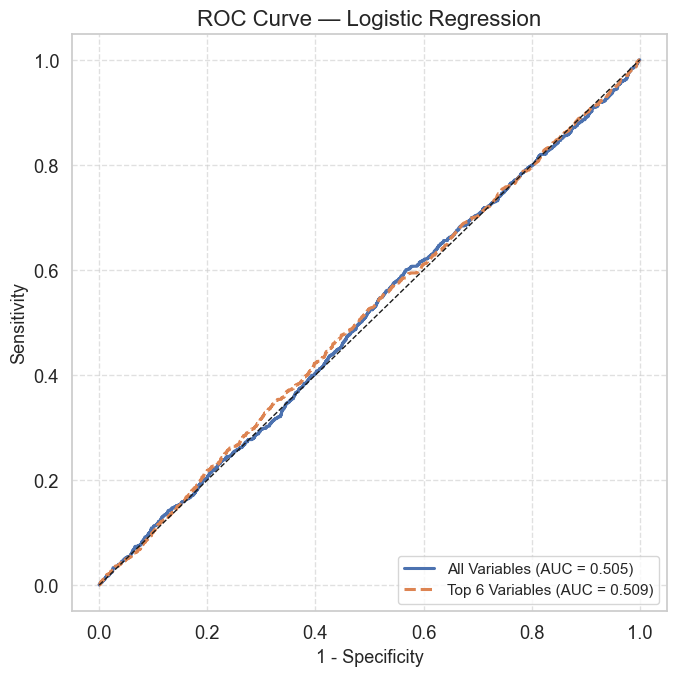

ValueError: Found input variables with inconsistent numbers of samples: [15974, 3194]

<Figure size 700x700 with 0 Axes>

In [144]:
# ============================================
# ROC CURVES — COMPARAÇÃO: ALL VARIABLES vs TOP 6 VARIABLES
# ============================================

import warnings
warnings.filterwarnings('ignore')
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# --- Função para carregar dados salvos ---
def load_data(model, version=''):
    path = f'5fold/{model}_results{version}.pkl'
    with open(path, 'rb') as f:
        auc, metrics, models, err, feat, probs, preds, _vars = pkl.load(f)
    return auc, metrics, models, err, feat, probs, preds, _vars

# --- Carregar resultados (ALL VARIABLES) ---
print("🔄 Carregando resultados com todas as variáveis...")
rf_auc_all, _, _, _, _, rf_probs_all, _, _ = load_data('rf')
lr_auc_all, _, _, _, _, lr_probs_all, _, _ = load_data('lr')
sv_auc_all, _, _, _, _, sv_probs_all, _, _ = load_data('svm')
xg_auc_all, _, _, _, _, xg_probs_all, _, _ = load_data('xgb')

# --- Carregar resultados (TOP VARIABLES) ---
print("🔄 Carregando resultados com top variáveis...")
rf_auc_top, _, _, _, _, rf_probs_top, _, _ = load_data('rf', '_top')
lr_auc_top, _, _, _, _, lr_probs_top, _, _ = load_data('lr', '_top')
sv_auc_top, _, _, _, _, sv_probs_top, _, _ = load_data('svm', '_top')
# Caso o XGB top ainda não tenha sido rodado, envolvemos em try
try:
    xg_auc_top, _, _, _, _, xg_probs_top, _, _ = load_data('xgb', '_top')
except:
    print("⚠️ Resultados de XGB (Top) não encontrados, pulando...")
    xg_probs_top = np.full_like(xg_probs_all, np.nan)

# --- Carregar o vetor real (true) ---
data = np.load('encoded_data.npy')
outcome = np.load('outcome.npy')
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits=5)
true = np.concatenate([outcome[test] for _, test in sk.split(data, outcome)])

# --- Função para plotar duas curvas por modelo ---
def plot_roc_comparison(true_values, probs_all, probs_top, model_name):
    plt.figure(figsize=(7, 7))
    fpr_all, tpr_all, _ = roc_curve(true_values, probs_all)
    fpr_top, tpr_top, _ = roc_curve(true_values, probs_top)
    auc_all = roc_auc_score(true_values, probs_all)
    auc_top = roc_auc_score(true_values, probs_top)
    
    plt.plot(fpr_all, tpr_all, label=f'All Variables (AUC = {auc_all:.3f})', linewidth=2.2)
    plt.plot(fpr_top, tpr_top, label=f'Top 6 Variables (AUC = {auc_top:.3f})', linewidth=2.2, linestyle='--')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.title(f'ROC Curve — {model_name}', fontsize=16)
    plt.xlabel('1 - Specificity', fontsize=13)
    plt.ylabel('Sensitivity', fontsize=13)
    plt.legend(loc='lower right', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    return auc_all, auc_top

# --- Gerar gráficos individuais por modelo ---
print("\n📈 Gerando curvas comparativas (All vs Top 6)...")

auc_results = {}
for name, probs_all, probs_top in [
    ('Logistic Regression', lr_probs_all, lr_probs_top),
    ('SVM (Linear)', sv_probs_all, sv_probs_top),
    ('Random Forest', rf_probs_all, rf_probs_top),
    ('Gradient Boosting', xg_probs_all, xg_probs_top)
]:
    auc_all, auc_top = plot_roc_comparison(true, probs_all, probs_top, name)
    auc_results[name] = {'All': auc_all, 'Top': auc_top}

# --- Exibir tabela resumo das AUCs ---
auc_df = pd.DataFrame(auc_results).T
auc_df.columns = ['All Variables', 'Top 6 Variables']
print("\n=== AUC Comparison — All Variables vs Top 6 Variables ===")
display(auc_df.round(3))


🔍 Gerando matriz de correlação das variáveis cognitivas e funcionais...


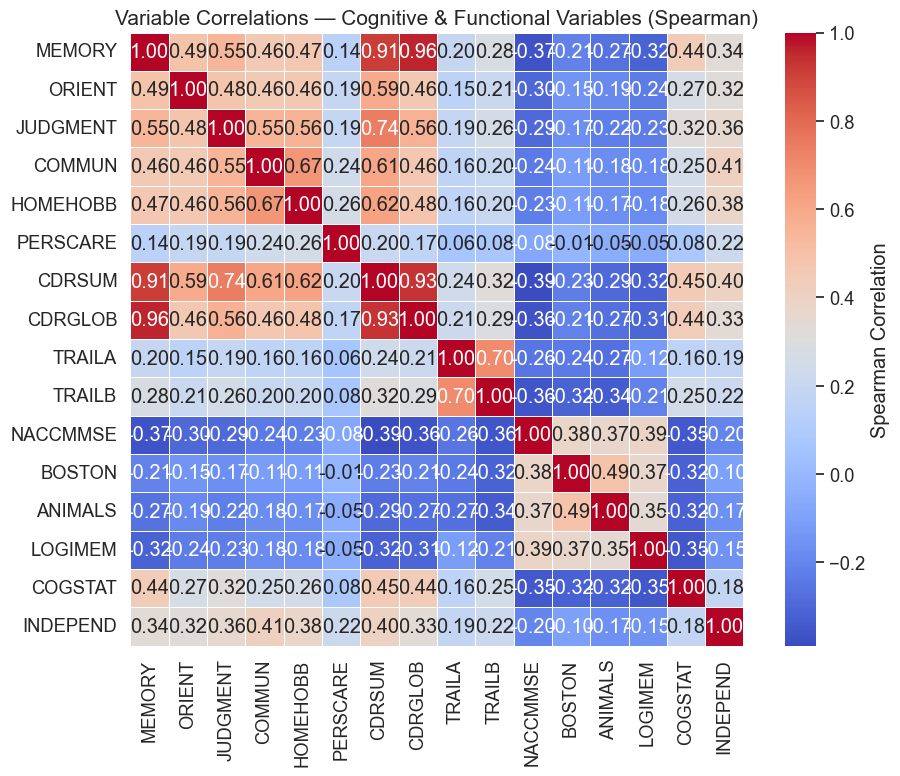


=== Pares de variáveis mais correlacionadas (|r| ≥ 0.7) ===


Var1     Var2  Spearman_r
6     MEMORY  CDRGLOB    0.959324
75    CDRSUM  CDRGLOB    0.930224
5     MEMORY   CDRSUM    0.910778
32  JUDGMENT   CDRSUM    0.743312

In [ ]:
# spearman Heatmap

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Gerando matriz de correlação das variáveis cognitivas e funcionais...")

with open('processed_data.pkl', 'rb') as f:
    [data, variables, outcome] = pickle.load(f)

df_corr = pd.DataFrame(data, columns=variables)

cog_vars = [
    'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE',
    'CDRSUM', 'CDRGLOB', 'MMSE', 'TRAILA', 'TRAILB',
    'NACCMMSE', 'BOSTON', 'ANIMALS', 'LOGIMEM', 'COGSTAT', 'INDEPEND'
]

cog_vars_present = [v for v in cog_vars if v in df_corr.columns]

df_cog = df_corr[cog_vars_present].copy()

corr_matrix = df_cog.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Spearman Correlation'},
    square=True,
    linewidths=0.5
)
plt.title('Variable Correlations — Cognitive & Functional Variables (Spearman)', fontsize=15)
plt.tight_layout()
plt.show()

corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Var1', 'Var2', 'Spearman_r']
strong_corrs = corr_pairs[np.abs(corr_pairs['Spearman_r']) >= 0.7].sort_values(by='Spearman_r', ascending=False)

print("\n=== Pares de variáveis mais correlacionadas (|r| ≥ 0.7) ===")
display(strong_corrs)
